In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# # import numpy as np # linear algebra
# # import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# # import os
# # for dirname, _, filenames in os.walk('/kaggle/input'):
# #     for filename in filenames:
# #         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Introduction**

Welcome to the Capstone Project on Credit Card Fraud Detection.


Although digital transactions in India registered a 51% growth in 2018-19, their safety remains a concern. Fraudulent activities have increased severalfold, with around 52,304 cases of credit/debit card fraud reported in FY'19 alone. Due to this steep increase in banking frauds, it is the need of the hour to detect these fraudulent transactions in time in order to help consumers as well as banks, who are losing their credit worth each day. Machine learning can play a vital role in detecting fraudulent transactions.


Until now, you have learnt about the different types of machine learning models, but now you will learn which model to choose for your purpose and why. Understanding the models based on different scenarios is an important skill that a data scientist/machine learning engineer should possess. In addition, tuning your model is equally important to get the best fit for your given data.
 
By the end of this module, you will be able to understand how you can build a machine learning model capable of detecting fraudulent transactions. You will also learn how to handle class imbalances present in any data set, along with model selection and hyperparameter tuning.

# **Project Understanding**

Imagine you get a call from your bank, and the customer care executive informs you that your card is about to expire in a week. Immediately, you check your card details and realise that it will expire in the next 8 days. Now, in order to renew your membership, the executive asks you to verify a few details such as your credit card number, the expiry date and the CVV number. Will you share these details with the executive?


In such situations, you need to be careful because the details that you might share with them could grant them unhindered access to your credit card account.
 
In this module, you will understand frauds from a bank’s perspective and learn to what extent these frauds affect their business. Banks need to be cautious about their customers’ transactions, as they cannot afford to lose their customers’ money to fraudsters. Every fraud is a loss to the bank as the bank is responsible for the fraud transactions if it is reported within a certain time frame by the customer.

# **The project pipeline can be briefly summarized in the following four steps**
      
    
    

 **1.   Data Understanding :**
     Here, you need to load the data and understand the features present in it. This would help you choose the features that you will need for your final model.




 **2.   Train/Test Split:**
     Now you are familiar with the train/test split, which you can perform in order to check the performance of your models with unseen data. Here, for validation, you can use the k-fold cross-validation method. You need to choose an appropriate k value so that the minority class is correctly represented in the test folds.
     Model-Building/Hyperparameter Tuning:
      This is the final step at which you can try different models and fine-tune their hyperparameters until you get the desired level of performance.

**3.   Exploratory data analytics (EDA):**
     Normally, in this step, you need to perform univariate and bivariate analyses of the data, followed by feature transformations, if necessary. For the current data set, because Gaussian variables are used, you do not need to perform Z-scaling. However, you can check if there is any skewness in the data and try to mitigate it, as it might cause problems during the model-building phase.    Can you think why skewness can be an issue while modelling? Well, some of the data points in a skewed distribution towards the tail may act as outliers for the machine learning models which are sensitive to outliers and hence that may cause a problem. Also, if the values of any independent feature are skewed, depending on the model, skewness may affect model assumptions or may impair the interpretation of feature importance. 






## Content
***
1. <a href='#1'>**Data Loading**</a>
2. <a href='#2'>**Exploratory Data Analysis**</a>
3. <a href='#3'>**Data Preparation**</a>
4. <a href='4'>**Data Scaling**</a>
5. <a href='#5'>**Model Building**</a>
# 6. <a href='#6'>**Logestic Regression**</a>
*    <a href='#6.1'>**Logestic Regression with Imbalanced data**</a>
*    <a href='#6.2'>**Logestic Regression with RandomOverSampler**</a>
*    <a href='#6.3'>**Logestic Regression with SMOTE**</a>
*    <a href='#6.4'>**Logestic Regression with ADASYN**</a>
# 7. <a href='#7'>**Decision Tree**</a>
*    <a href='#7.1'>**Decision Tree with Imbalanced data**</a>
*    <a href='#7.2'>**Decision tree with RandomOverSampler**</a>
*    <a href='#7.3'>**Decision tree with SMOTE**</a>
*    <a href='#7.4'>**Decision tree with ADASYN**</a>
# 8.   <a href='#8'>**XGBOOST**</a>
*    <a href='#8.1'>**XGBOOST  with Imbalanced data**</a>
*    <a href='8.2'>**XGBOOST  with RandomOverSampler**</a>
*    <a href='#8.3'>**XGBOOST  with SMOTE**</a>
*    <a href='#8.4'>**XGBOOST  with ADASYN**</a>
# 9. <a href='#9'>**Random Forest**</a>
*    <a href='#9.1'>**Random Forest Imbalanced**</a>
*    <a href='#9.2'>**Random Forest  with SMOTERandomOverSampler**</a>
*    <a href='#9.3'>**Random Forest  with RandomOverSampler**</a>
*    <a href='#9.4'>**Random Forest  with ADASYN**</a>
10. <a href='#23'>**Conclusion**</a>

# **1.Data Loading**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
data=pd.read_csv('/content/drive/My Drive/Capstone Project - Credit Card Fraud Detection/creditcard.csv')
#data = pd.read_csv('/content/drive/My Drive/Case_study/creditcard.csv')
data_XGBoost=data
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# **2. Exploratory Data Analysis**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
data.shape

(284807, 31)

# Checking Missing values in data Set

In [8]:
data.isnull().sum().sum()

0

In [9]:
# determine the number of fraud cases
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

outlier_fraction = len(fraud) / float(len(valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(fraud)))
print('Valid Cases: {}'.format(len(valid)))

0.0017304750013189597
Fraud Cases: 492
Valid Cases: 284315


In [10]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Text(0.5, 1.0, 'Transaction Class Distribution')

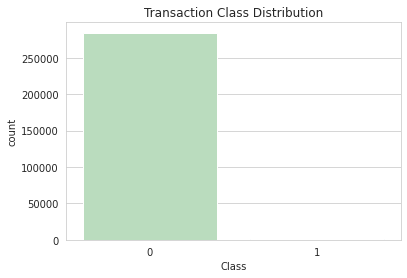

In [11]:
sns.countplot(x='Class',data=data,palette='GnBu')
plt.title('Transaction Class Distribution')

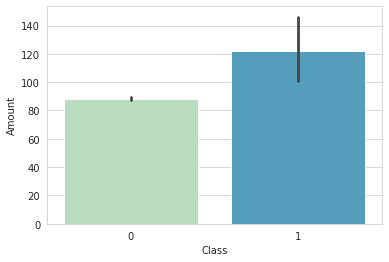

In [12]:
sns.barplot(x='Class',y='Amount',data=data,palette='GnBu')

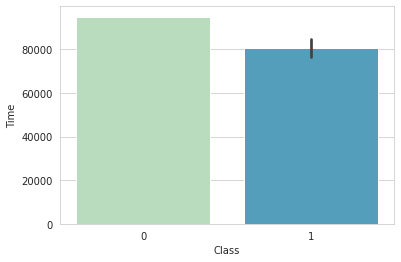

In [13]:
sns.barplot(x='Class',y='Time',data=data,palette='GnBu')

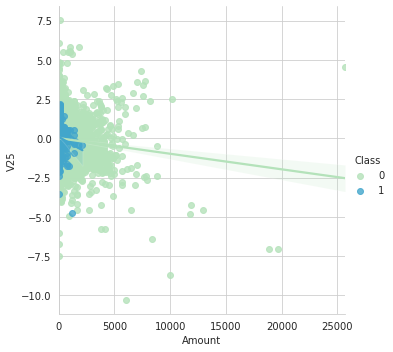

In [14]:
#sns.lmplot(x='Amount',y='V25', data= df, hue= 'Class',palette= 'Set1')
sns.lmplot(x='Amount',y='V25',data=data,palette='GnBu',hue='Class')

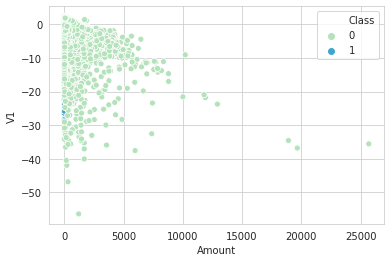

In [15]:
sns.scatterplot(x='Amount',y='V1',data=data,palette='GnBu',hue='Class')

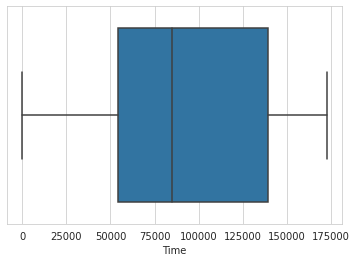

In [16]:
sns.boxplot(x=data['Time'])

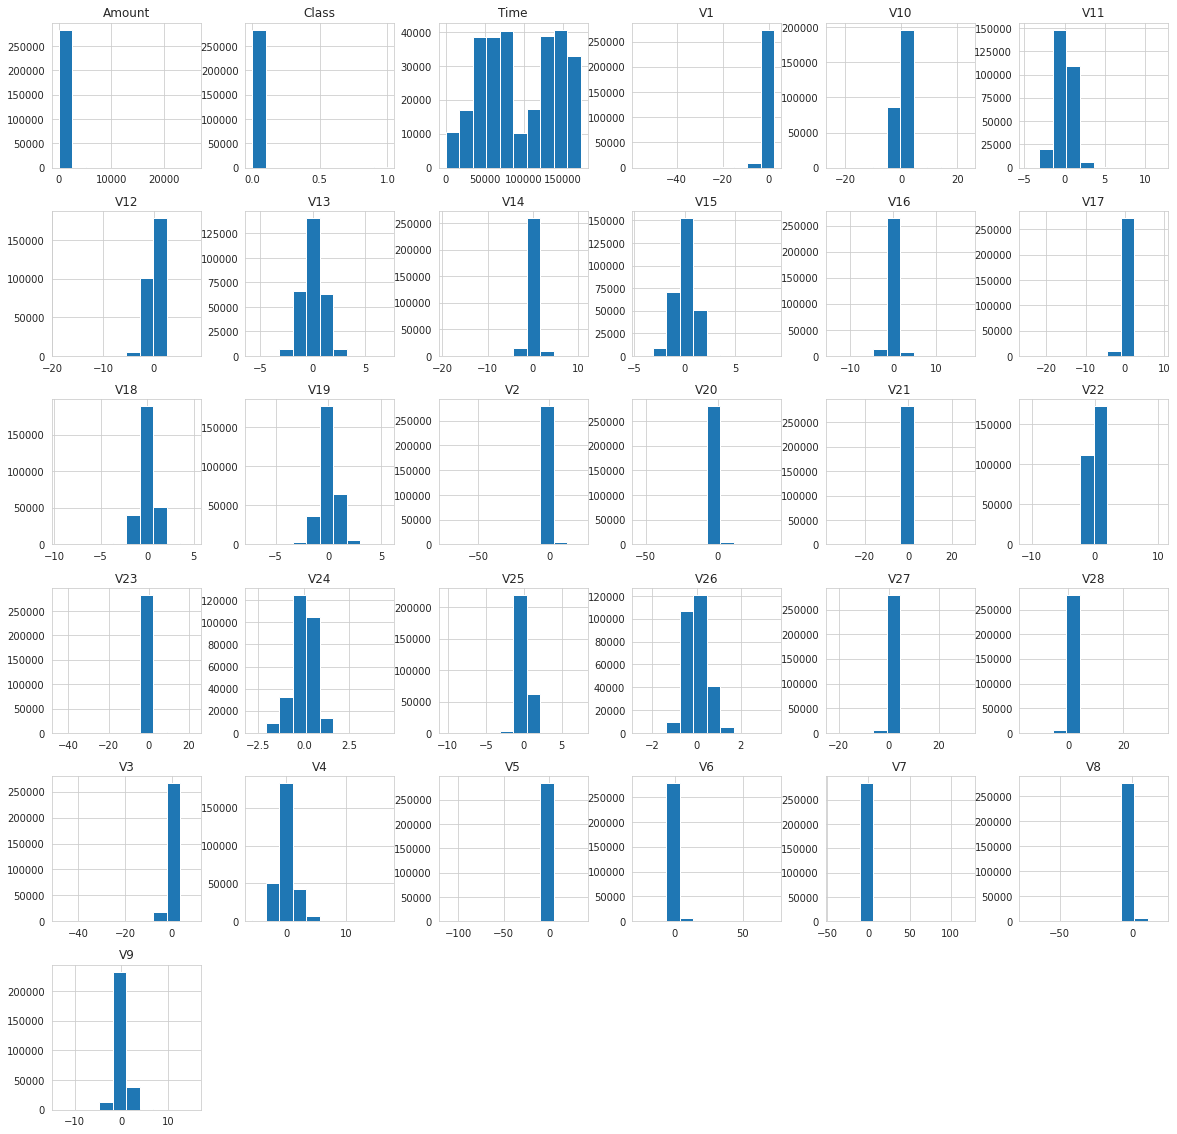

In [17]:
data.hist(figsize=(20,20));

# **Checking high correlation**

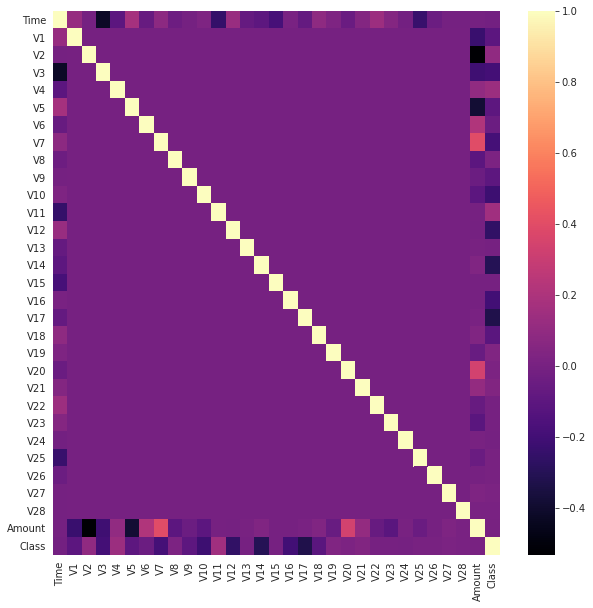

In [18]:
plt.figure(figsize=(10,10))
correlation=data.corr()
sns.heatmap(correlation,cmap='magma',linecolor='white')

We can see from above that thier is lots of values are close to 0.
Most of them are fairly unrelated.
The lighter squares signify a stonger correlation. 

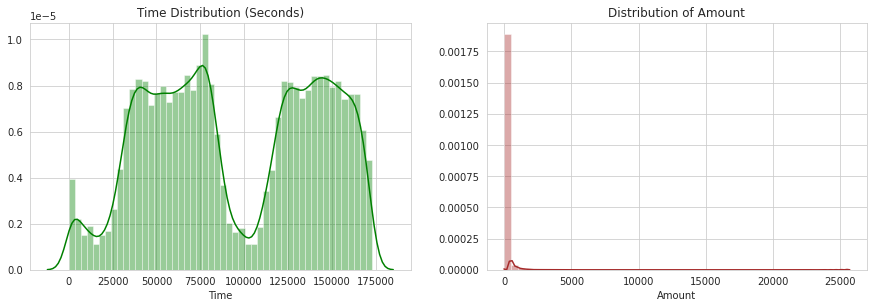

In [19]:
# plot the time feature
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.title('Time Distribution (Seconds)')

sns.distplot(data['Time'], color='green');

#plot the amount feature
plt.subplot(2, 2, 2)
plt.title('Distribution of Amount')
sns.distplot(data['Amount'],color='brown');

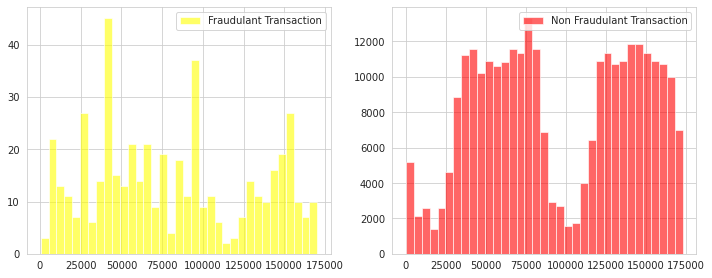

In [20]:
# data[data.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6)
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
data[data.Class == 1].Time.hist(bins=35, color='yellow', alpha=0.6, label="Fraudulant Transaction")
plt.legend()

plt.subplot(2, 2, 2)
data[data.Class == 0].Time.hist(bins=35, color='red', alpha=0.6, label="Non Fraudulant Transaction")
plt.legend()

We can see clear observation we can have an idea how skewed are these features ,we can also see further distribution of the features.
Here we are going to implement techniques that help distribution to be minimise (less skewed)

In [21]:
Vfeatures = data.iloc[:,1:29].columns
print(Vfeatures)


Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')


In our given data only non-transformed variable that we are going to work 
* Time
* Amount
* Class (1:Fraud,0:Not Fraud)

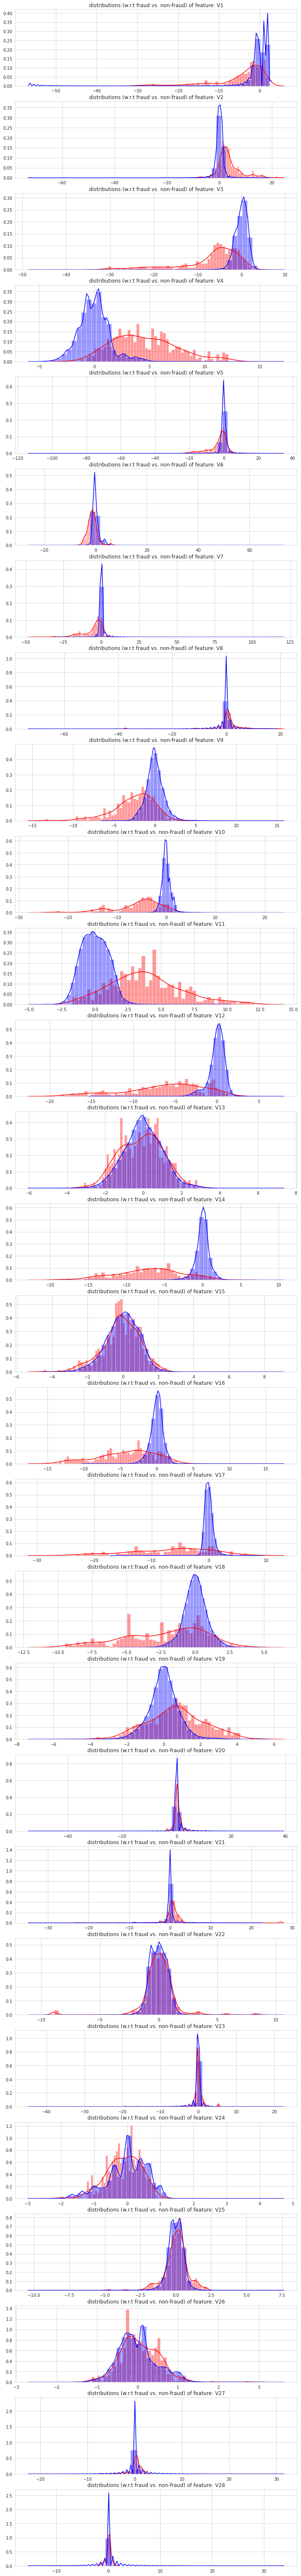

In [22]:
bins = 50
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, V in enumerate(data[Vfeatures]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[V][data.Class == 1], bins = bins, norm_hist = True, color = 'red')
    sns.distplot(data[V][data.Class == 0], bins = bins, norm_hist = True, color = 'blue')
    ax.set_xlabel('')
    ax.set_title('distributions (w.r.t fraud vs. non-fraud) of feature: ' + str(V))
plt.show()

**Above shows the distribution of the given features when comparing fraudulent transcaction to normal tansction**

Text(0, 0.5, '% of Fraud')

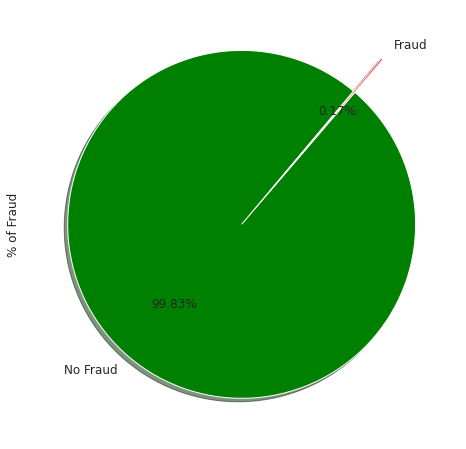

In [23]:
# Calculation class distribution
plt.figure(figsize=(15,8))
ax = data.Class.value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%',shadow=True,labels=['No Fraud','Fraud'],
                                          fontsize=12,startangle=50,colors ='gr')
ax.set_ylabel('% of Fraud', fontsize=12)

# 3 : Model Preparation 

# Liberaries Used 

In [24]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE , ADASYN
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import roc_auc_score

from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# Splitting data into Training and Testing Samples 

We don't use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as training data and the rest 30% is used as testing data.

In [25]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [26]:
X = data.drop(['Time','Class'],axis=1)
y = data['Class']

In [27]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [28]:
X.shape

(284807, 29)

In [29]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,shuffle=True,random_state=101)

In [30]:
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (199364, 29)
X_test: (85443, 29)
y_train: (199364,)
y_test: (85443,)


# **4.Data Scaling:**

# **Standard Scalar Process**

In [31]:
scaler = StandardScaler()
X_train['scaled_Amount'] = scaler.fit_transform(X_train['Amount'].values.reshape(-1,1))
X_test['scaled_Amount'] = scaler.transform(X_test['Amount'].values.reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
X_train.drop('Amount',1,inplace=True)
X_test.drop('Amount',1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# **Power Transforming the Data:**

we are using power Transforming technique for reducing Skewess in the data

In [33]:

pt = PowerTransformer(method = 'yeo-johnson', standardize = True,copy = False)
X_train[X_train.columns] = pt.fit_transform(X_train)
X_test[X_test.columns] = pt.transform(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://p

# **Performing Various Sampling Technique:**

In [34]:
# Random over sampling
ros = RandomOverSampler(random_state = 42)
X_ros, y_ros = ros.fit_resample(X_train,y_train)
print('RandomOverSample dataset shape %s' % Counter(y_ros))

# SMOTE data

smote = SMOTE(random_state = 42)
X_smote, y_smote = smote.fit_resample(X_train,y_train)
print('smote dataset shape %s' % Counter(y_smote))

# ADASYN data

adasyn = ADASYN(random_state = 42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_train,y_train)
print('adasyn dataset shape %s' % Counter(y_adasyn))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


RandomOverSample dataset shape Counter({0: 199016, 1: 199016})
smote dataset shape Counter({0: 199016, 1: 199016})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


adasyn dataset shape Counter({0: 199016, 1: 199015})


### Print the class distribution after applying ADASYN

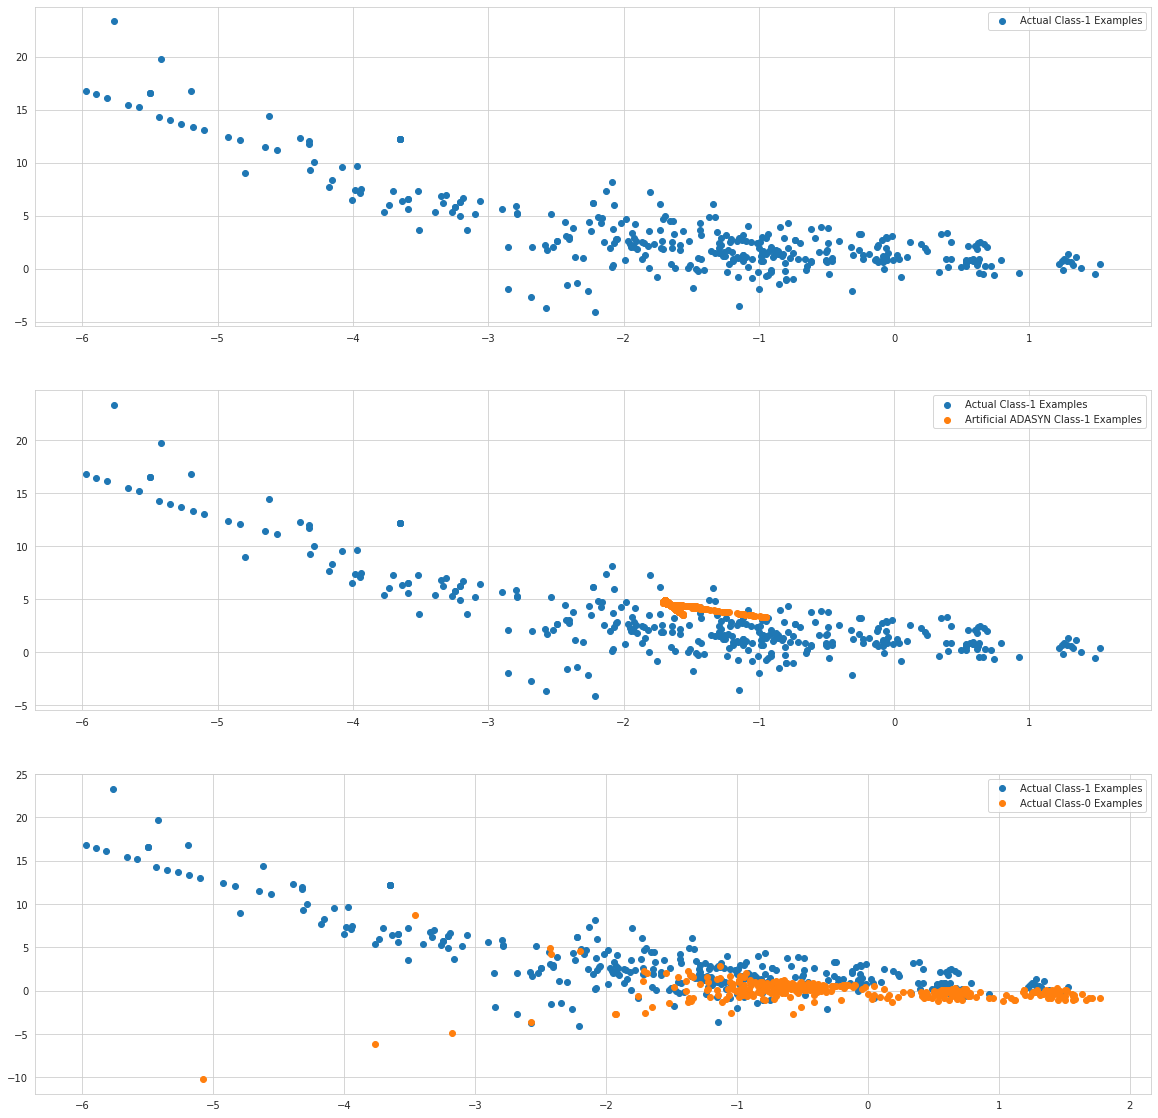

In [227]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### Print the class distribution after applying SMOTE

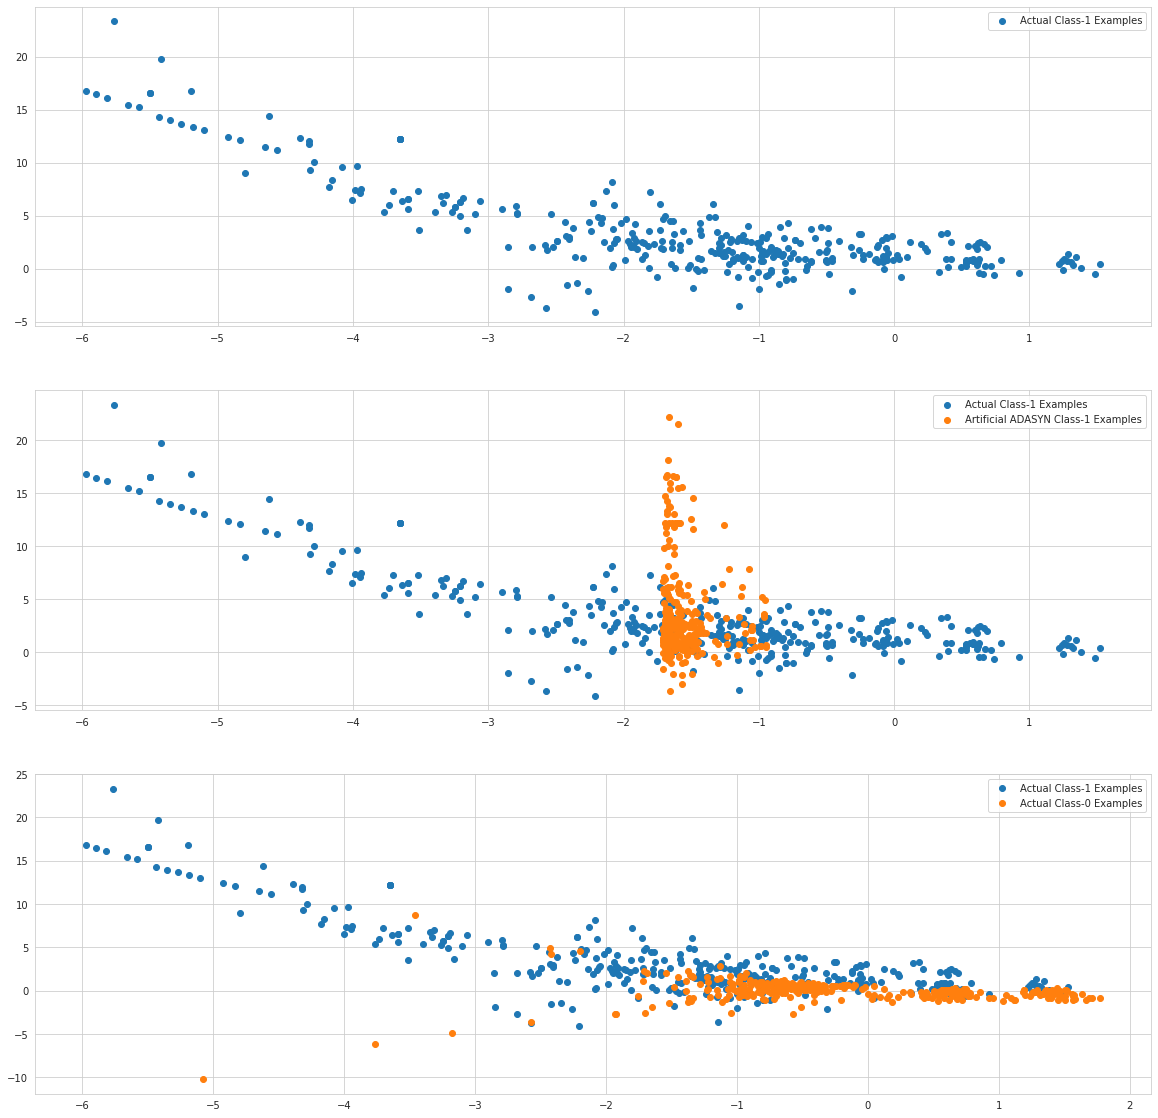

In [228]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_smote_1 = X_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### Print the class distribution after applying Random Over Sampling

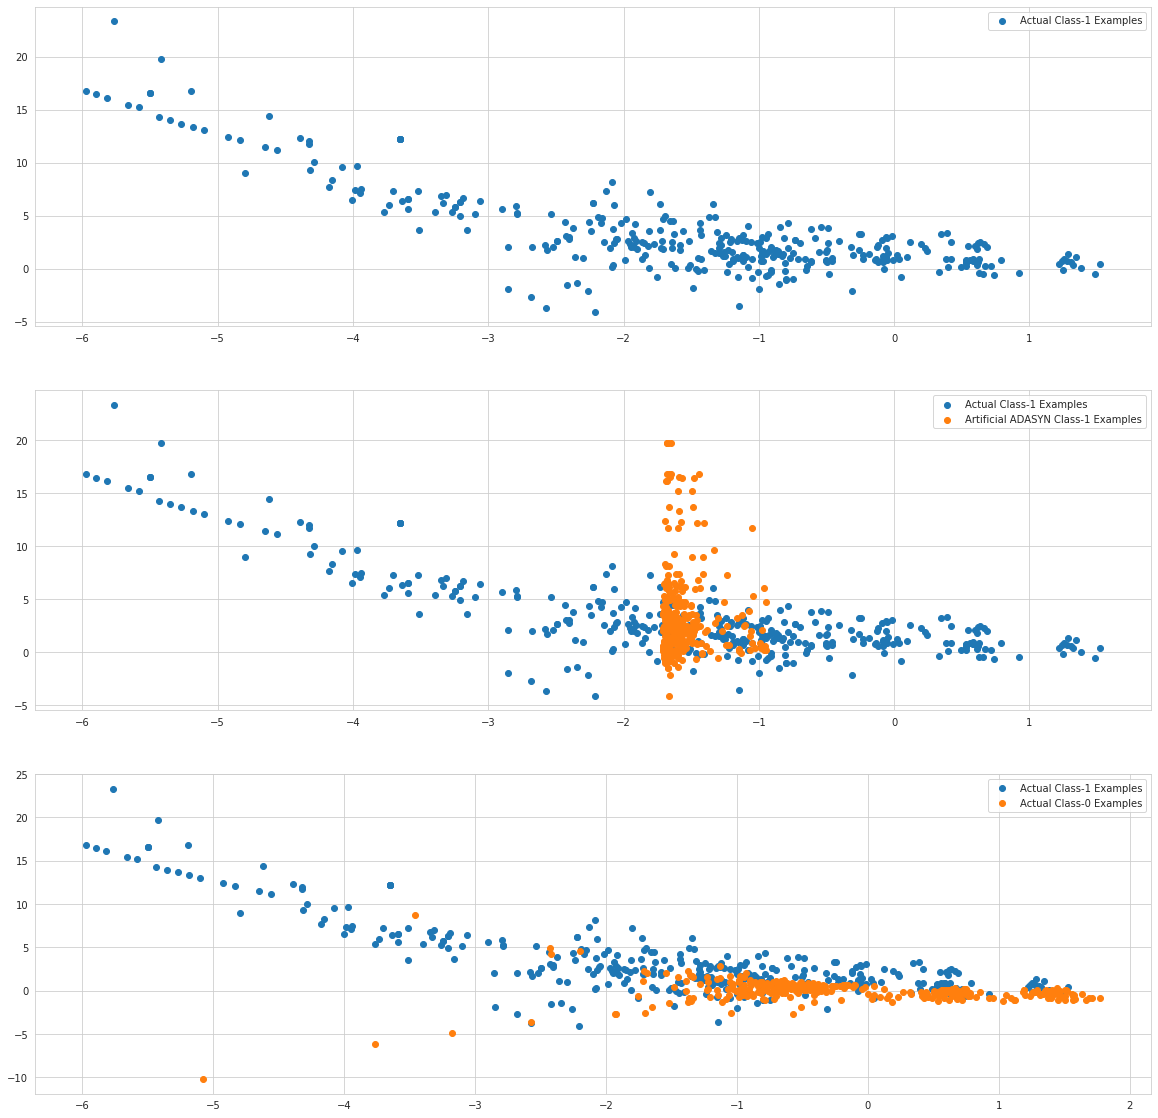

In [229]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_ros_1 = X_ros[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_ros_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

# Def Function for ROC Plot 

In [35]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()
    return None

# **5: Model Building**

We are aware that our dataset is highly **imbalanced**, however, we check the performance of imbalance dataset first and later we implement some techniques to balance the dataset and again check the performance of balanced dataset. Finally, we will compare each regression models performance.

# **6.Logestic Regression**

# **6.1 : Logestic Regression with imbalanced data**

In [36]:
imbalanced_lr = LogisticRegression()
imbalanced_lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# **Predict from X_train Set**

In [37]:
X_train_pred = imbalanced_lr.predict_proba(X_train)
y_train_pred_final = pd.DataFrame({'Class':y_train.values,'Class_prob': X_train_pred[:,1]})
y_train_pred_final.head()

,Class,Class_prob
0,0,0.000122
1,0,0.000279
2,0,0.000192
3,0,0.004957
4,0,0.000118


In [38]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Class, y_train_pred_final.Class_prob, drop_intermediate = False )

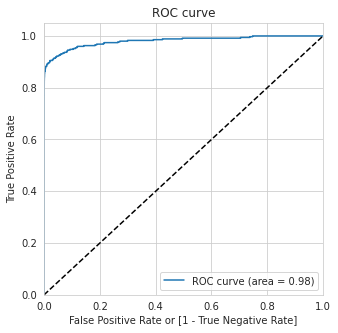

In [39]:
draw_roc(y_train_pred_final.Class, y_train_pred_final.Class_prob)

# Obtaind ROC score Curve 98% for train data 

In [40]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Class_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Class,Class_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000122,1,0,0,0,0,0,0,0,0,0
1,0,0.000279,1,0,0,0,0,0,0,0,0,0
2,0,0.000192,1,0,0,0,0,0,0,0,0,0
3,0,0.004957,1,0,0,0,0,0,0,0,0,0
4,0,0.000118,1,0,0,0,0,0,0,0,0,0


In [41]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Class, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.001746  1.000000  0.000000
0.1   0.1  0.999202  0.795977  0.999558
0.2   0.2  0.999197  0.741379  0.999648
0.3   0.3  0.999238  0.701149  0.999759
0.4   0.4  0.999218  0.660920  0.999809
0.5   0.5  0.999167  0.614943  0.999839
0.6   0.6  0.999157  0.603448  0.999849
0.7   0.7  0.999082  0.554598  0.999859
0.8   0.8  0.999027  0.522989  0.999859
0.9   0.9  0.998947  0.474138  0.999864


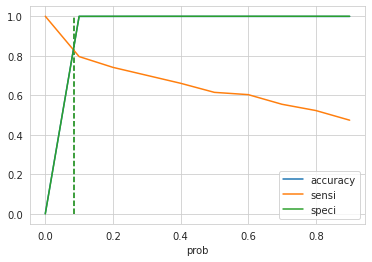

In [42]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(0.085,ymin=0,ymax=1,colors='g',linestyles='--')
plt.show()

In [43]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Class_prob.map( lambda x: 1 if x >= 0.085 else 0)
y_train_pred_final.head()

,Class,Class_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.000122,1,0,0,0,0,0,0,0,0,0,0
1,0,0.000279,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000192,1,0,0,0,0,0,0,0,0,0,0
3,0,0.004957,1,0,0,0,0,0,0,0,0,0,0
4,0,0.000118,1,0,0,0,0,0,0,0,0,0,0


In [44]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Class, y_train_pred_final.final_predicted )
confusion2

array([[198925,     91],
       [    70,    278]])

In [45]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

acc_score_train=metrics.accuracy_score(y_train_pred_final.Class, y_train_pred_final.final_predicted)
acc_score_train

0.9991924319335487

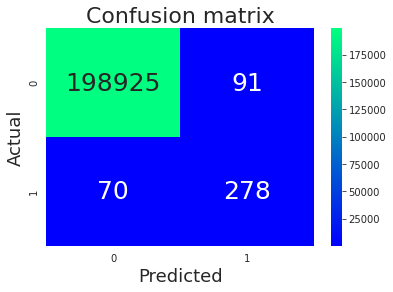

In [46]:
# Heatmap for Confusion Matrix
sns.heatmap(pd.DataFrame(confusion2), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.ylabel('Actual',fontsize = 18)
plt.xlabel('Predicted',fontsize = 18)
plt.show()

In [47]:
X_test_pred = imbalanced_lr.predict_proba(X_test)

In [48]:
y_test_pred_final = pd.DataFrame({'Class':y_test.values, 'Class_Prob':X_test_pred[:,1]})
y_test_pred_final.head()

,Class,Class_Prob
0,0,0.000736
1,0,0.000029
2,0,0.000074
3,0,0.000114
4,0,0.001305


In [49]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Class_Prob.map( lambda x: 1 if x >=0.1  else 0)
y_test_pred_final.head()

,Class,Class_Prob,final_predicted
0,0,0.000736,0
1,0,0.000029,0
2,0,0.000074,0
3,0,0.000114,0
4,0,0.001305,0


In [50]:
confusion2_test = metrics.confusion_matrix(y_test_pred_final.Class, y_test_pred_final.final_predicted )
confusion2_test

array([[85269,    30],
       [   31,   113]])

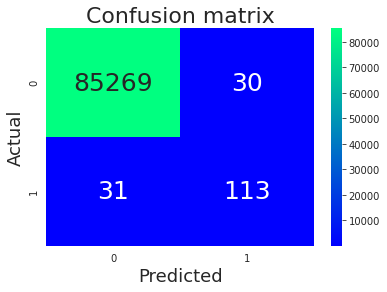

In [51]:
# Heatmap for Confusion Matrix
sns.heatmap(pd.DataFrame(confusion2_test), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.ylabel('Actual',fontsize = 18)
plt.xlabel('Predicted',fontsize = 18)
plt.show()

In [52]:
TP = confusion2_test[1,1] # true positive 
TN = confusion2_test[0,0] # true negatives
FP = confusion2_test[0,1] # false positives
FN = confusion2_test[1,0]
TP / float(TP+FN) # Sensitivity

acc_score_test=metrics.accuracy_score(y_test_pred_final.Class, y_test_pred_final.final_predicted)
acc_score_test

0.9992860737567735

In [53]:
roc_auc_score_imb_test=metrics.roc_auc_score(y_test_pred_final.Class, y_test_pred_final.final_predicted)
roc_auc_score_imb_test

0.8921852591081568

# **Obtaind ROC score Curve 99.9% for Test data**

In [54]:
print(classification_report(y_test_pred_final.Class, y_test_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.79      0.78      0.79       144

    accuracy                           1.00     85443
   macro avg       0.89      0.89      0.89     85443
weighted avg       1.00      1.00      1.00     85443



# **6.2 : Logestic Regression with RandomOverSampler**

In [55]:
logReg_RandomOverSampler=LogisticRegression()
logReg_RandomOverSampler.fit(X_ros,y_ros)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
X_train_pred = logReg_RandomOverSampler.predict_proba(X_ros)

In [57]:
y_ros

array([0, 0, 0, ..., 1, 1, 1])

In [58]:
X_train_pred = logReg_RandomOverSampler.predict_proba(X_ros)
y_train_pred_final = pd.DataFrame({'Class':y_ros,'Class_prob': X_train_pred[:,1]})
y_train_pred_final.head()

,Class,Class_prob
0,0,0.003654
1,0,0.034575
2,0,0.056689
3,0,0.572279
4,0,0.023865


In [59]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Class, y_train_pred_final.Class_prob, drop_intermediate = False )    

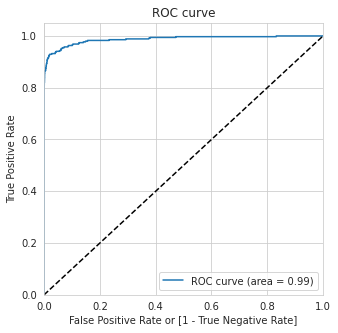

In [60]:
draw_roc(y_train_pred_final.Class, y_train_pred_final.Class_prob)

# Obtaind ROC score Curve 99% for train data 

In [61]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Class_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Class,Class_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.003654,1,0,0,0,0,0,0,0,0,0
1,0,0.034575,1,0,0,0,0,0,0,0,0,0
2,0,0.056689,1,0,0,0,0,0,0,0,0,0
3,0,0.572279,1,1,1,1,1,1,0,0,0,0
4,0,0.023865,1,0,0,0,0,0,0,0,0,0


In [62]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Class, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.895644  0.982695  0.808593
0.2   0.2  0.934334  0.963053  0.905616
0.3   0.3  0.943291  0.943427  0.943155
0.4   0.4  0.947399  0.931910  0.962887
0.5   0.5  0.951836  0.929061  0.974610
0.6   0.6  0.953165  0.923348  0.982981
0.7   0.7  0.947369  0.906349  0.988388
0.8   0.8  0.939133  0.886296  0.991970
0.9   0.9  0.930970  0.865785  0.996156


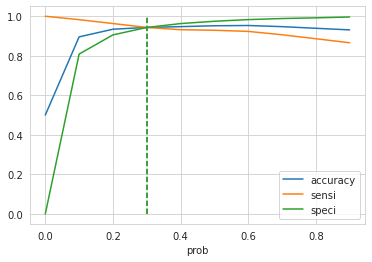

In [63]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(0.30,ymin=0,ymax=1,colors='g',linestyles='--')
plt.show()

In [64]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Class_prob.map( lambda x: 1 if x >= 0.30 else 0)
y_train_pred_final.head()

,Class,Class_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.003654,1,0,0,0,0,0,0,0,0,0,0
1,0,0.034575,1,0,0,0,0,0,0,0,0,0,0
2,0,0.056689,1,0,0,0,0,0,0,0,0,0,0
3,0,0.572279,1,1,1,1,1,1,0,0,0,0,1
4,0,0.023865,1,0,0,0,0,0,0,0,0,0,0


In [65]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Class, y_train_pred_final.final_predicted )
confusion2

array([[187703,  11313],
       [ 11259, 187757]])

In [66]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# acc_score_ros_train=metrics.accuracy_score(y_train_pred_final.Class, y_train_pred_final.final_predicted)
# acc_score_ros_train
roc_auc_score_ros_train=metrics.roc_auc_score(y_train_pred_final.Class, y_train_pred_final.final_predicted)
roc_auc_score_ros_train

0.9432909916790609

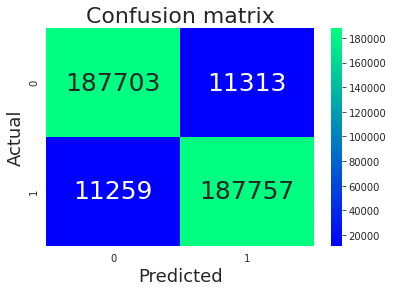

In [67]:
# Heatmap for Confusion Matrix
sns.heatmap(pd.DataFrame(confusion2), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.ylabel('Actual',fontsize = 18)
plt.xlabel('Predicted',fontsize = 18)
plt.show()

In [68]:
X_test_pred = logReg_RandomOverSampler.predict_proba(X_test)
y_test_pred_final = pd.DataFrame({'Class':y_test.values, 'Class_Prob':X_test_pred[:,1]})
y_test_pred_final.head()

,Class,Class_Prob
0,0,0.180813
1,0,0.011868
2,0,0.004836
3,0,0.030435
4,0,0.002084


In [69]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Class_Prob.map( lambda x: 1 if x >=0.30  else 0)
y_test_pred_final.head()

,Class,Class_Prob,final_predicted
0,0,0.180813,0
1,0,0.011868,0
2,0,0.004836,0
3,0,0.030435,0
4,0,0.002084,0


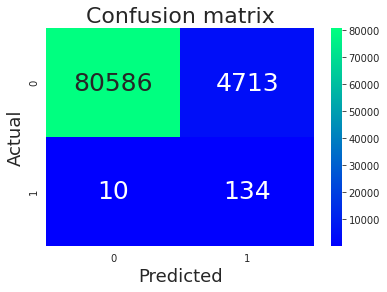

In [70]:
confusion2_test = metrics.confusion_matrix(y_test_pred_final.Class, y_test_pred_final.final_predicted )

# Heatmap for Confusion Matrix
sns.heatmap(pd.DataFrame(confusion2_test), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.ylabel('Actual',fontsize = 18)
plt.xlabel('Predicted',fontsize = 18)
plt.show()

In [71]:
TP = confusion2_test[1,1] # true positive 
TN = confusion2_test[0,0] # true negatives
FP = confusion2_test[0,1] # false positives
FN = confusion2_test[1,0]
TP / float(TP+FN) # Sensitivity

roc_auc_score_ros_test=metrics.roc_auc_score(y_test_pred_final.Class, y_test_pred_final.final_predicted)
roc_auc_score_ros_test


0.9376514281136551

Obtaind roc_auc_score  94% for test  data 

In [72]:
print(classification_report(y_test_pred_final.Class, y_test_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     85299
           1       0.03      0.93      0.05       144

    accuracy                           0.94     85443
   macro avg       0.51      0.94      0.51     85443
weighted avg       1.00      0.94      0.97     85443



# **6.3 : Logestic Regression with SMOTE**

In [73]:
logReg_Smote=LogisticRegression()
logReg_Smote.fit(X_smote,y_smote)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
X_train_pred = logReg_Smote.predict_proba(X_smote)
y_train_pred_final = pd.DataFrame({'Class':y_smote,'Class_prob': X_train_pred[:,1]})
y_train_pred_final.head()


,Class,Class_prob
0,0,0.001901
1,0,0.033523
2,0,0.049762
3,0,0.524196
4,0,0.019302


In [75]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Class, y_train_pred_final.Class_prob, drop_intermediate = False )


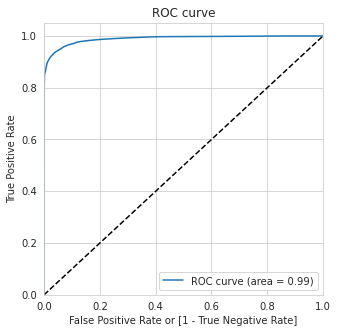

In [76]:
draw_roc(y_train_pred_final.Class, y_train_pred_final.Class_prob)


In [77]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Class_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Class,Class_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.001901,1,0,0,0,0,0,0,0,0,0
1,0,0.033523,1,0,0,0,0,0,0,0,0,0
2,0,0.049762,1,0,0,0,0,0,0,0,0,0
3,0,0.524196,1,1,1,1,1,1,0,0,0,0
4,0,0.019302,1,0,0,0,0,0,0,0,0,0


In [78]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Class, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.893546  0.986368  0.800725
0.2   0.2  0.936060  0.968123  0.903998
0.3   0.3  0.945758  0.949130  0.942387
0.4   0.4  0.948826  0.935689  0.961963
0.5   0.5  0.948265  0.923695  0.972836
0.6   0.6  0.946720  0.912545  0.980896
0.7   0.7  0.943474  0.899908  0.987041
0.8   0.8  0.938023  0.884678  0.991368
0.9   0.9  0.929847  0.865207  0.994488


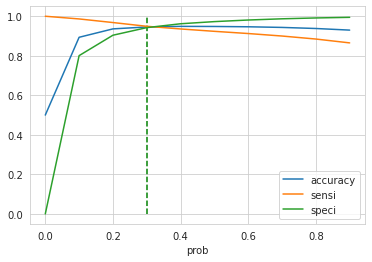

In [79]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(0.3,ymin=0,ymax=1,colors='g',linestyles='--')
plt.show()


In [80]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Class_prob.map( lambda x: 1 if x >= 0.3 else 0)
y_train_pred_final.head()

,Class,Class_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.001901,1,0,0,0,0,0,0,0,0,0,0
1,0,0.033523,1,0,0,0,0,0,0,0,0,0,0
2,0,0.049762,1,0,0,0,0,0,0,0,0,0,0
3,0,0.524196,1,1,1,1,1,1,0,0,0,0,1
4,0,0.019302,1,0,0,0,0,0,0,0,0,0,0


In [81]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Class, y_train_pred_final.final_predicted )
confusion2

array([[187550,  11466],
       [ 10124, 188892]])

In [82]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

acc_score=metrics.accuracy_score(y_train_pred_final.Class, y_train_pred_final.final_predicted)
acc_score


0.9457581299995981

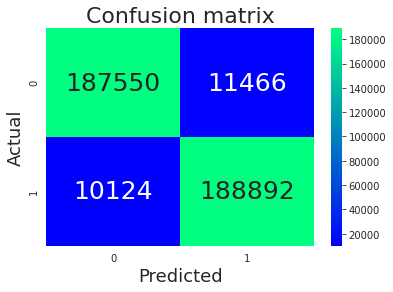

In [83]:
# Heatmap for Confusion Matrix
sns.heatmap(pd.DataFrame(confusion2), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.ylabel('Actual',fontsize = 18)
plt.xlabel('Predicted',fontsize = 18)
plt.show()


In [84]:
X_test_pred = logReg_Smote.predict_proba(X_test)
y_test_pred_final = pd.DataFrame({'Class':y_test, 'Class_Prob':X_test_pred[:,1]})
y_test_pred_final.head()


,Class,Class_Prob
148943,0,0.165205
110204,0,0.016514
120616,0,0.005398
5861,0,0.025823
201551,0,0.000709


In [85]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Class_Prob.map( lambda x: 1 if x >=0.3  else 0)
y_test_pred_final.head()


,Class,Class_Prob,final_predicted
148943,0,0.165205,0
110204,0,0.016514,0
120616,0,0.005398,0
5861,0,0.025823,0
201551,0,0.000709,0


In [86]:
confusion2_test = metrics.confusion_matrix(y_test_pred_final.Class, y_test_pred_final.final_predicted )
confusion2_test

array([[80526,  4773],
       [   11,   133]])

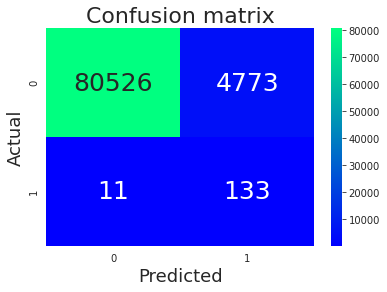

In [87]:
# Heatmap for Confusion Matrix
sns.heatmap(pd.DataFrame(confusion2_test), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.ylabel('Actual',fontsize = 18)
plt.xlabel('Predicted',fontsize = 18)
plt.show()


In [88]:
TP = confusion2_test[1,1] # true positive 
TN = confusion2_test[0,0] # true negatives
FP = confusion2_test[0,1] # false positives
FN = confusion2_test[1,0]
TP / float(TP+FN) # Sensitivity


0.9236111111111112

In [89]:
acc_score=metrics.accuracy_score(y_test_pred_final.Class, y_test_pred_final.final_predicted)
acc_score


0.9440094565967955

In [90]:
roc_auc_score_smote_test=metrics.roc_auc_score(y_test_pred_final.Class, y_test_pred_final.final_predicted)
roc_auc_score_smote_test

0.9338275018855242

In [91]:
print(classification_report(y_test_pred_final.Class, y_test_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     85299
           1       0.03      0.92      0.05       144

    accuracy                           0.94     85443
   macro avg       0.51      0.93      0.51     85443
weighted avg       1.00      0.94      0.97     85443



# **6.4 : Logestic Regression with ADASYN**

In [92]:
logReg_adasyn=LogisticRegression()
logReg_adasyn.fit(X_adasyn, y_adasyn)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
X_train_pred = logReg_adasyn.predict_proba(X_adasyn)
y_train_pred_final = pd.DataFrame({'Class':y_adasyn,'Class_prob': X_train_pred[:,1]})
y_train_pred_final.head()


,Class,Class_prob
0,0,0.002312
1,0,0.076097
2,0,0.147503
3,0,0.826837
4,0,0.060189


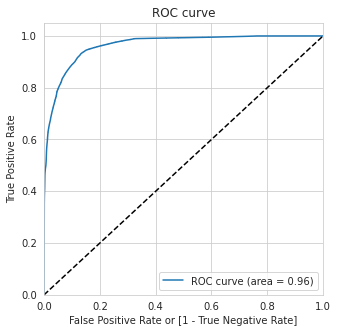

In [94]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Class, y_train_pred_final.Class_prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Class, y_train_pred_final.Class_prob)


In [95]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Class_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()


,Class,Class_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.002312,1,0,0,0,0,0,0,0,0,0
1,0,0.076097,1,0,0,0,0,0,0,0,0,0
2,0,0.147503,1,1,0,0,0,0,0,0,0,0
3,0,0.826837,1,1,1,1,1,1,1,1,1,0
4,0,0.060189,1,0,0,0,0,0,0,0,0,0


In [96]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Class, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.499999  1.000000  0.000000
0.1   0.1  0.793710  0.991342  0.596078
0.2   0.2  0.861167  0.974906  0.747427
0.3   0.3  0.892521  0.950551  0.834491
0.4   0.4  0.897840  0.914172  0.881507
0.5   0.5  0.892237  0.871537  0.912937
0.6   0.6  0.884720  0.834495  0.934945
0.7   0.7  0.868593  0.782986  0.954200
0.8   0.8  0.843987  0.719433  0.968540
0.9   0.9  0.814449  0.645615  0.983283


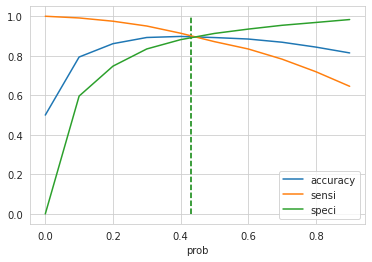

In [97]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(0.43,ymin=0,ymax=1,colors='g',linestyles='--')
plt.show()

In [98]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Class_prob.map( lambda x: 1 if x >= 0.42 else 0)
y_train_pred_final.head()

,Class,Class_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.002312,1,0,0,0,0,0,0,0,0,0,0
1,0,0.076097,1,0,0,0,0,0,0,0,0,0,0
2,0,0.147503,1,1,0,0,0,0,0,0,0,0,0
3,0,0.826837,1,1,1,1,1,1,1,1,1,0,1
4,0,0.060189,1,0,0,0,0,0,0,0,0,0,0


In [99]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Class, y_train_pred_final.final_predicted )
confusion2

array([[176786,  22230],
       [ 19381, 179634]])

In [100]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

acc_score_adasyn_train=metrics.accuracy_score(y_train_pred_final.Class, y_train_pred_final.final_predicted)
acc_score_adasyn_train

0.8954578914707648

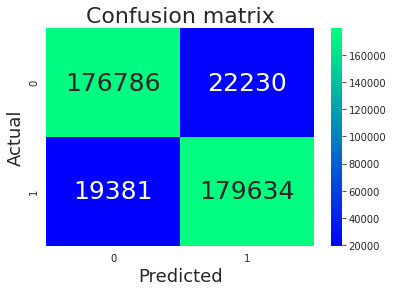

In [101]:
# Heatmap for Confusion Matrix
sns.heatmap(pd.DataFrame(confusion2), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.ylabel('Actual',fontsize = 18)
plt.xlabel('Predicted',fontsize = 18)
plt.show()

In [102]:
X_test_pred = logReg_adasyn.predict_proba(X_test)
y_test_pred_final = pd.DataFrame({'Class':y_test, 'Class_Prob':X_test_pred[:,1]})
y_test_pred_final.head()

,Class,Class_Prob
148943,0,0.338247
110204,0,0.050257
120616,0,0.007918
5861,0,0.039077
201551,0,0.000531


In [103]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Class_Prob.map( lambda x: 1 if x >=0.42  else 0)
y_test_pred_final.head()

,Class,Class_Prob,final_predicted
148943,0,0.338247,0
110204,0,0.050257,0
120616,0,0.007918,0
5861,0,0.039077,0
201551,0,0.000531,0


In [104]:
confusion2_test = metrics.confusion_matrix(y_test_pred_final.Class, y_test_pred_final.final_predicted )
confusion2_test

array([[75852,  9447],
       [    6,   138]])

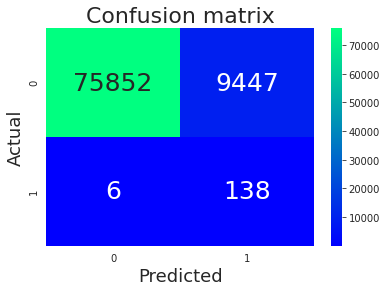

In [105]:
# Heatmap for Confusion Matrix
sns.heatmap(pd.DataFrame(confusion2_test), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.ylabel('Actual',fontsize = 18)
plt.xlabel('Predicted',fontsize = 18)
plt.show()

In [106]:
TP = confusion2_test[1,1] # true positive 
TN = confusion2_test[0,0] # true negatives
FP = confusion2_test[0,1] # false positives
FN = confusion2_test[1,0]
TP / float(TP+FN) # Sensitivity

0.9583333333333334

In [107]:
roc_auc_score_adasyn_test=metrics.roc_auc_score(y_test_pred_final.Class, y_test_pred_final.final_predicted)
roc_auc_score_adasyn_test

0.9237908709363534

In [108]:
print(classification_report(y_test_pred_final.Class, y_test_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     85299
           1       0.01      0.96      0.03       144

    accuracy                           0.89     85443
   macro avg       0.51      0.92      0.48     85443
weighted avg       1.00      0.89      0.94     85443



In [109]:
logreg_final_df = pd.DataFrame({'Model':['Logestic_Regression_Imbalance',
                                         'Logestic_Regression_RandomOverSampling',
                                         'Logestic_Regression_Smote',
                                         'Logestic_Regression_Adasyn'],
                              'ROC_AUC_Score':  [roc_auc_score_imb_test,
                                                 roc_auc_score_ros_test,
                                                 roc_auc_score_smote_test,
                                                 roc_auc_score_adasyn_test]
										 })
logreg_final_df

,Model,ROC_AUC_Score
0,Logestic_Regression_Imbalance,0.892185
1,Logestic_Regression_RandomOverSampling,0.937651
2,Logestic_Regression_Smote,0.933828
3,Logestic_Regression_Adasyn,0.923791


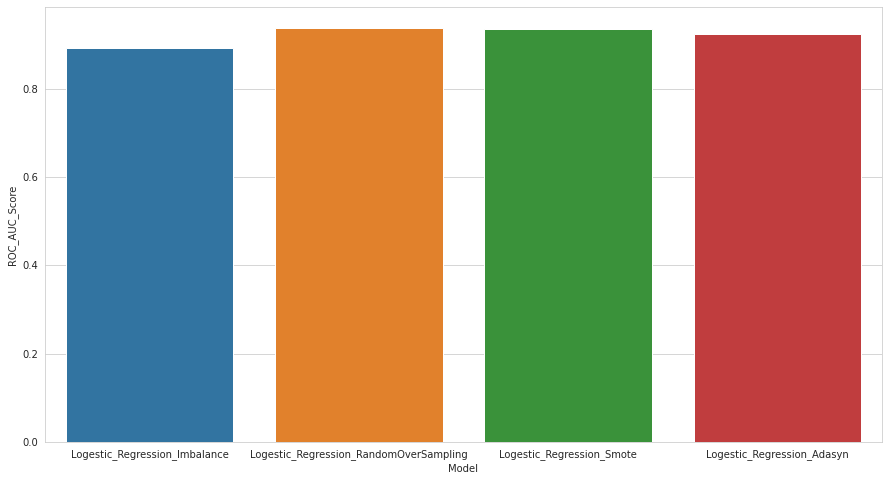

In [110]:
plt.figure(figsize=(15,8))
sns.barplot(x=logreg_final_df.Model,y=logreg_final_df.ROC_AUC_Score)
plt.show()

# 7. **Decision Tree**

# **7.1 Decision Tree with Imbalanced data**

In [111]:
# Bulding decesion tree with default parameters

imbalanced_dt = DecisionTreeClassifier()
imbalanced_dt.fit(X_train,y_train)
y_pred_imb_dt = imbalanced_dt.predict(X_test)


In [112]:
print(classification_report(y_test,y_pred_imb_dt))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.72      0.79      0.75       144

    accuracy                           1.00     85443
   macro avg       0.86      0.90      0.88     85443
weighted avg       1.00      1.00      1.00     85443



In [113]:
#Create the parameter grid 
param_grid = {'max_depth': range(5, 15, 5),
              'min_samples_leaf': range(50, 150, 50),
              'min_samples_split': range(50, 150, 50),
              'criterion': ["entropy", "gini"]
              }
              


# Instantiate the grid search model

# imbalanced_dt = DecisionTreeClassifier()
n_folds = 5
grid_search = GridSearchCV(estimator = imbalanced_dt, 
                           param_grid = param_grid,
                           scoring = 'roc_auc',
                           cv = n_folds, verbose = 1)

# # Fit the grid search to the data
grid_search.fit(X_train,y_train)


# cv results
scores_dt = pd.DataFrame(grid_search.cv_results_)
scores_dt.head()


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  8.1min finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.484429,0.028248,0.014668,0.000260,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.949061,0.971243,0.939416,0.941170,0.969989,0.954176,0.013817,2
1,5.481689,0.022921,0.015203,0.001143,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.949075,0.971243,0.939415,0.941181,0.969989,0.954181,0.013814,1
2,5.543918,0.044096,0.014619,0.000386,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.948980,0.945929,0.949054,0.941015,0.969821,0.950960,0.009874,4
3,5.503405,0.051723,0.014517,0.000346,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.948980,0.945929,0.963188,0.941015,0.969821,0.953787,0.010894,3
4,7.399825,0.195665,0.014017,0.000236,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.919277,0.956150,0.955156,0.927387,0.948413,0.941276,0.015111,5


In [114]:
# printing the optimal accuracy score and hyperparameters
print("best roc auc", grid_search.best_score_)


best roc auc 0.9541806252606913


In [115]:
print(grid_search.best_estimator_)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [116]:
# model with optimal hyperparameters
imbalanced_dt = DecisionTreeClassifier(criterion = "gini",
                                       random_state = 100,max_depth=5,
                                       min_samples_leaf=50, 
                                       min_samples_split=50)

imbalanced_dt.fit(X_train,y_train)

y_pred_imb_dt = imbalanced_dt.predict(X_test)


In [117]:
#score of reduced fractioned test set
#imbalanced_dt.score(X_test,y_test)

In [118]:
print(classification_report(y_test,y_pred_imb_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.79      0.75      0.77       144

    accuracy                           1.00     85443
   macro avg       0.90      0.87      0.89     85443
weighted avg       1.00      1.00      1.00     85443



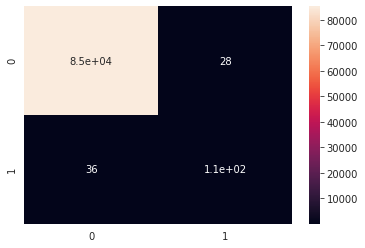

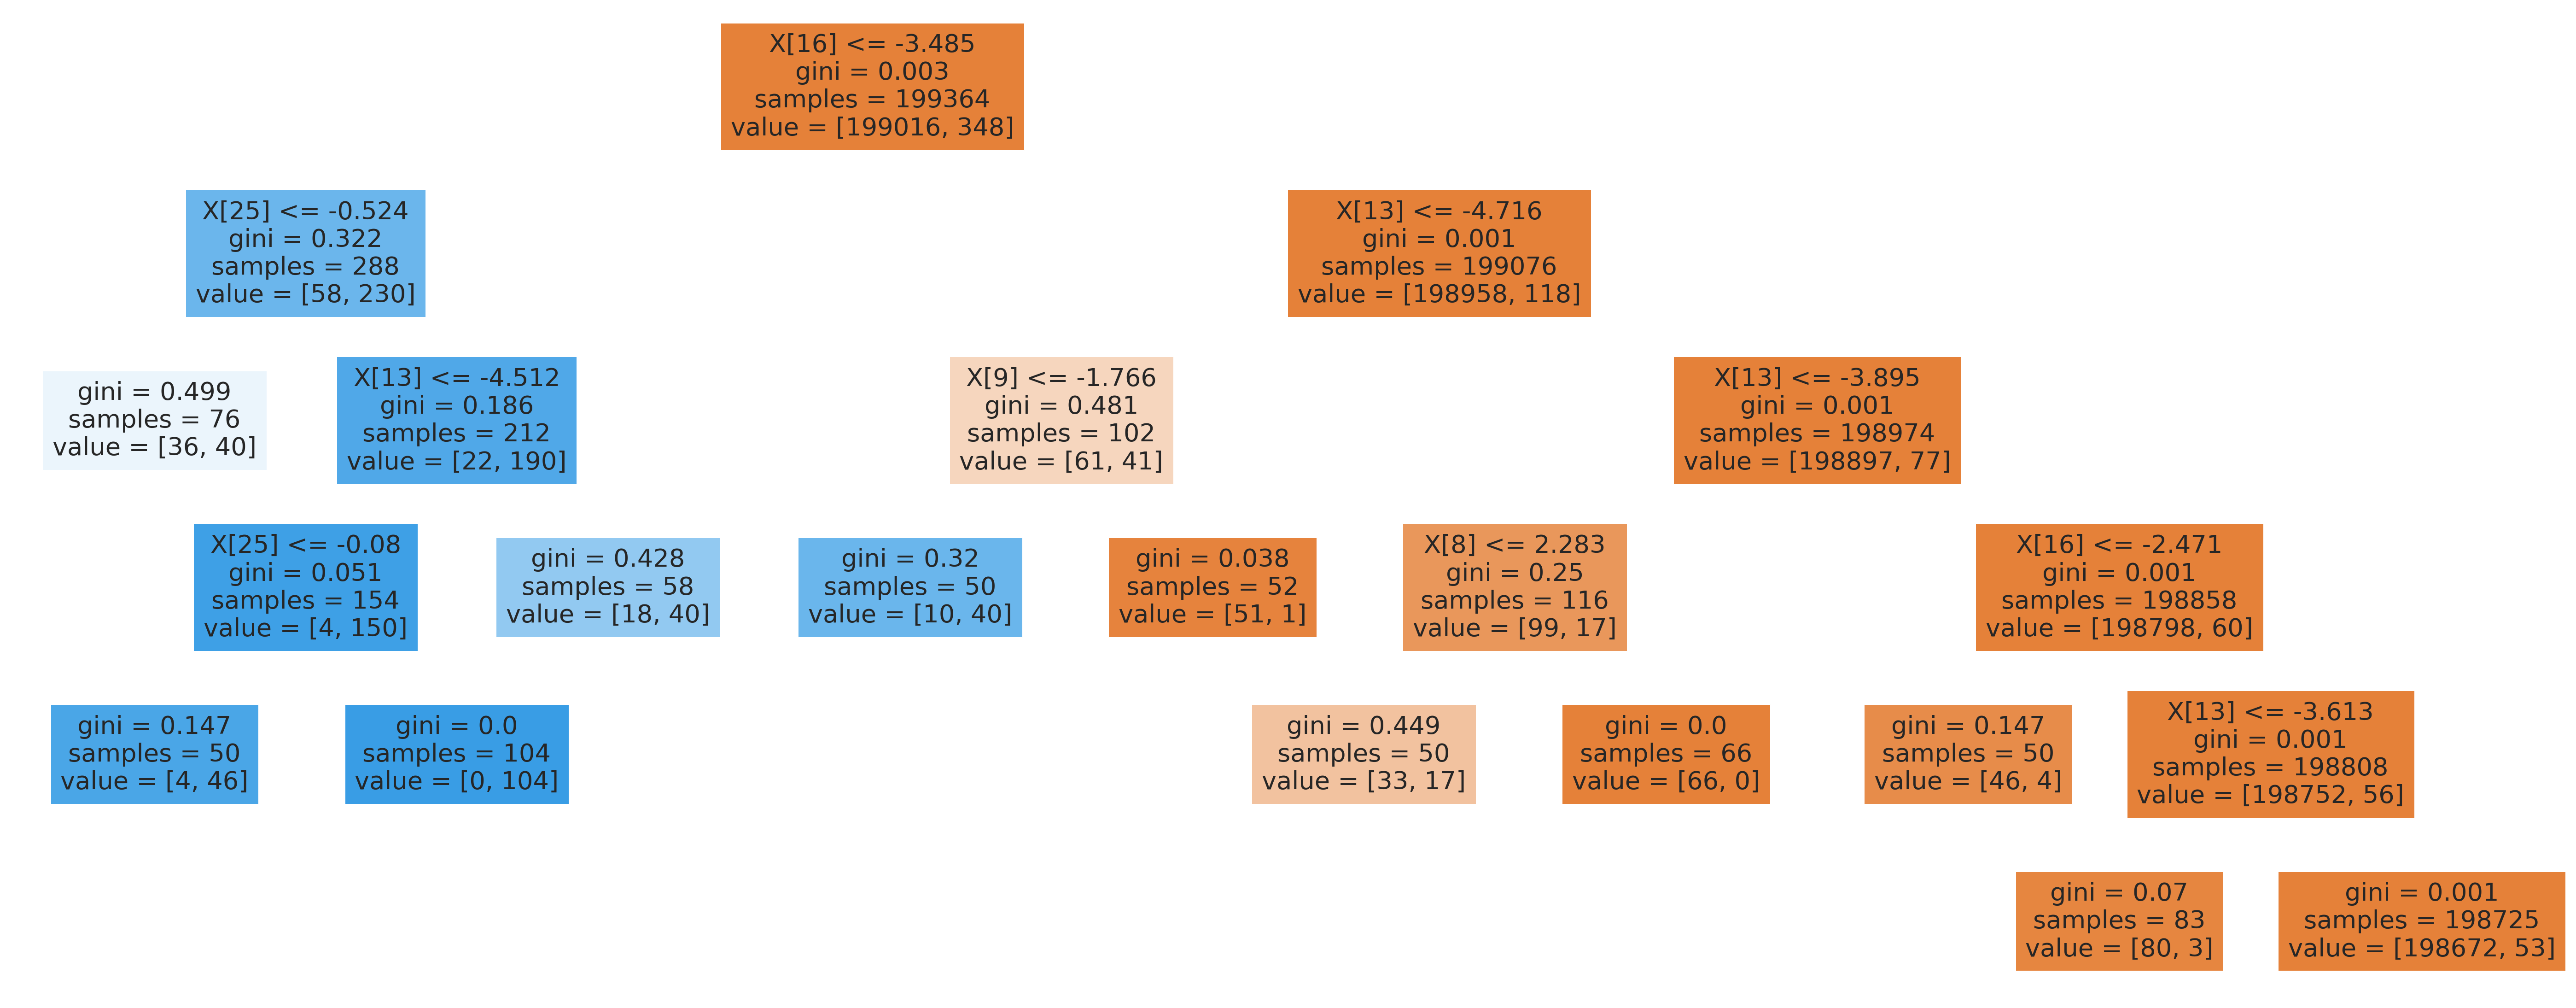

In [119]:
cm =confusion_matrix(y_test,y_pred_imb_dt)
sns.heatmap(cm, annot=True)

TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives



fig = plt.figure(figsize=(100,40))

t = tree.plot_tree(imbalanced_dt, filled=True)


In [120]:
print('AUC:',roc_auc_score(y_test,y_pred_imb_dt))

AUC: 0.8748358714639093


In [121]:
Dt_Im_rocauc_test=roc_auc_score(y_test,y_pred_imb_dt)

# 7.2 **Decision tree with over RandomOverSampler**

# **Hyperparameters Tuning**

In [122]:
# Fitting the decision tree with default hyperparameters, apart from

os_dt = DecisionTreeClassifier()
os_dt.fit(X_ros,y_ros)
y_pred_ro_dt = os_dt.predict(X_test)


In [123]:
 #Create the parameter grid 



param_grid = {'max_depth': range(5, 15, 5),
              'min_samples_leaf': range(50, 150, 50),
              'min_samples_split': range(50, 150, 50),
              'criterion': ["entropy", "gini"]
              }


In [124]:
# Instantiate the grid search model
os_dt = DecisionTreeClassifier()
n_folds = 5
grid_search = GridSearchCV(estimator = os_dt,
                           param_grid = param_grid,scoring = 'roc_auc',
                           cv = n_folds, verbose = 1)

In [125]:
# # Fit the grid search to the data
grid_search.fit(X_ros,y_ros)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  9.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                   

In [126]:
# cv results
scores_dt = pd.DataFrame(grid_search.cv_results_)
scores_dt.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.784402,0.042748,0.026975,0.001123,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.995060,0.993003,0.996143,0.996317,0.995020,0.995109,0.001181,9
1,6.800635,0.038566,0.026917,0.000545,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.995060,0.993003,0.996143,0.996317,0.995020,0.995109,0.001181,9
2,6.762775,0.068134,0.026465,0.000438,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.995060,0.992822,0.996143,0.996317,0.994980,0.995064,0.001246,11
3,6.782234,0.034511,0.026522,0.000141,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.995060,0.992822,0.996143,0.996317,0.994980,0.995064,0.001246,11
4,7.696647,0.249877,0.026171,0.000173,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.999649,0.999568,0.999810,0.999729,0.999694,0.999690,0.000081,1


In [127]:
# printing the optimal accuracy score and hyperparameters
print("ROC", grid_search.best_score_)


ROC 0.999690081907749


In [128]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [129]:
print('AUC:',roc_auc_score(y_test,y_pred_ro_dt))

AUC: 0.8436503505316593


In [130]:
Dt_ros_rocauc_test=roc_auc_score(y_test,y_pred_ro_dt)

# 7.3 **Decision tree with SMOTE**

In [131]:
DecisionTree_smote = DecisionTreeClassifier()
DecisionTree_smote.fit(X_smote,y_smote)

y_pred_DecisionTree_smote = DecisionTree_smote.predict(X_test)


In [132]:
  
  
 #Create the parameter grid 



param_grid = {'max_depth': range(5, 15, 5),
              'min_samples_leaf': range(50, 150, 50),
              'min_samples_split': range(50, 150, 50),
              'criterion': ["entropy", "gini"]
              }


In [133]:
n_folds = 5

# Instantiate the grid search model

grid_search = GridSearchCV(estimator = DecisionTree_smote, 
                           param_grid = param_grid,
                           cv = n_folds,scoring = 'roc_auc',
                           verbose = 1)


In [134]:
# # Fit the grid search to the data
grid_search.fit(X_smote,y_smote)
# cv results
smote_scores_dt = pd.DataFrame(grid_search.cv_results_)
smote_scores_dt.head()


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 17.2min finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,11.552848,0.065892,0.028504,0.001851,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.987021,0.986407,0.986889,0.987185,0.987003,0.986901,0.000264,12
1,11.563919,0.020292,0.026762,0.000279,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.987020,0.986407,0.986893,0.987185,0.987003,0.986902,0.000264,11
2,11.583012,0.026717,0.027175,0.000309,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.987022,0.986402,0.986968,0.987252,0.986994,0.986928,0.000282,9
3,11.613895,0.061771,0.029331,0.002915,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.987022,0.986399,0.986968,0.987252,0.986994,0.986927,0.000282,10
4,17.268509,0.453793,0.027629,0.000500,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.998869,0.998933,0.998808,0.998919,0.998815,0.998869,0.000051,1


In [135]:

# printing the optimal accuracy score and hyperparameters

print("ROC", grid_search.best_score_)


ROC 0.9988690946351209


In [136]:

print(grid_search.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [137]:
print('AUC:',roc_auc_score(y_test,y_pred_DecisionTree_smote))

AUC: 0.8981976879369433


In [138]:
Dt_smote_rocauc_test=roc_auc_score(y_test,y_pred_DecisionTree_smote)

# 7.4 **Decision tree with ADASYN**

In [139]:
DecisionTree_ADASYN_dt = DecisionTreeClassifier()
DecisionTree_ADASYN_dt.fit(X_adasyn, y_adasyn)
y_pred_DecisionTree_ADASYN = DecisionTree_ADASYN_dt.predict(X_test)


In [140]:
 #Create the parameter grid 


param_grid = {'max_depth': range(5, 15, 5),
              'min_samples_leaf': range(50, 150, 50),
              'min_samples_split': range(50, 150, 50),
              'criterion': ["entropy", "gini"]
              }



In [141]:
n_folds = 5

# Instantiate the grid search model

os_dt = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = DecisionTree_ADASYN_dt,
                           param_grid = param_grid,
                           scoring = 'roc_auc',
                           cv = n_folds, 
                           verbose = 1)


In [142]:
# # Fit the grid search to the data

grid_search.fit(X_adasyn, y_adasyn)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 17.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                   

In [143]:
# cv results
ADASYN_scores_dt = pd.DataFrame(grid_search.cv_results_)
ADASYN_scores_dt.head()

# printing the optimal accuracy score and hyperparameters


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,12.048345,0.124664,0.027688,0.001408,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.916800,0.965175,0.959754,0.935453,0.918227,0.939082,0.020262,5
1,12.032659,0.087266,0.026910,0.000266,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.916800,0.965175,0.959760,0.935338,0.918227,0.939060,0.020267,6
2,12.013069,0.054708,0.026516,0.000435,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.916799,0.965174,0.959762,0.935442,0.918083,0.939052,0.020294,7
3,12.076702,0.100163,0.027264,0.000431,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.916799,0.965174,0.959761,0.935443,0.918083,0.939052,0.020293,8
4,19.398455,0.275198,0.027191,0.000445,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.899814,0.958396,0.955489,0.958435,0.947108,0.943848,0.022403,2


In [144]:
print("ROC", grid_search.best_score_)

ROC 0.9467169499095395


In [145]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [146]:
print('AUC:',roc_auc_score(y_test,y_pred_DecisionTree_ADASYN))

AUC: 0.888015490607549


In [147]:
Dt_adasyn_rocauc_test=roc_auc_score(y_test,y_pred_DecisionTree_ADASYN)

In [148]:
decision_tree_final_df = pd.DataFrame({'Model':['Decision_Tree_Imbalance',
                                                 'Decision_Tree_RandomOverSampling',
                                                 'Decision_Tree_Smote',
                                                 'Decision_Tree_Adasyn'],
                                        'ROC_AUC_Score':  [Dt_Im_rocauc_test,
                                                           Dt_ros_rocauc_test,
                                                           Dt_smote_rocauc_test,
                                                           Dt_adasyn_rocauc_test]
										 })
decision_tree_final_df

,Model,ROC_AUC_Score
0,Decision_Tree_Imbalance,0.874836
1,Decision_Tree_RandomOverSampling,0.843650
2,Decision_Tree_Smote,0.898198
3,Decision_Tree_Adasyn,0.898198


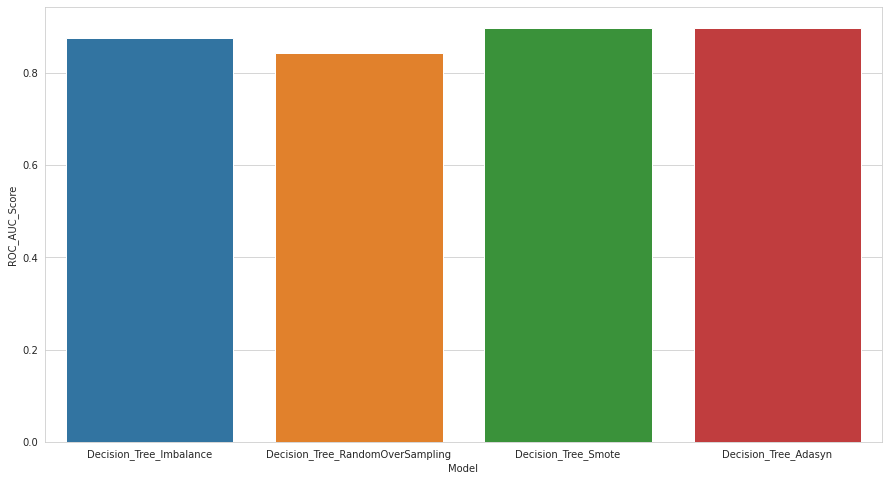

In [149]:
plt.figure(figsize=(15,8))
sns.barplot(x=decision_tree_final_df.Model,y=decision_tree_final_df.ROC_AUC_Score)
plt.show()

# 8. **XGBOOST**

# 8.1 **Bulding XGBOOST using imbalanced data**

In [150]:
folds = 2
param_grid = {'subsample' : [0.6,0.7],
              'max_depth' : [5,6],
              'learning_rate' : [0.1,0.2],
              'n_estimators' : [200,300],

}

imb_xg = XGBClassifier()

model_cv = GridSearchCV(estimator = imb_xg,
                        param_grid = param_grid,
                        scoring = 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score = True)

model_cv.fit(X_train,y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed: 31.7min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [5, 6],
                         'n_estimators': [200, 300], 'subsample': [0.6, 0.7]},
             pre_dispat

In [151]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,49.466658,0.207629,0.794233,0.018262,0.1,5,200,0.6,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.983483,0.972827,0.978155,0.005328,3,1.0,1.0,1.0,0.0
1,51.441770,0.665388,0.826242,0.017907,0.1,5,200,0.7,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.979222,0.976600,0.977911,0.001311,5,1.0,1.0,1.0,0.0
2,69.475754,1.439252,1.173669,0.012134,0.1,5,300,0.6,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.982182,0.975572,0.978877,0.003305,1,1.0,1.0,1.0,0.0
3,70.653550,1.216246,1.231356,0.030719,0.1,5,300,0.7,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.977613,0.977811,0.977712,0.000099,6,1.0,1.0,1.0,0.0
4,53.504218,0.837049,0.807961,0.020944,0.1,6,200,0.6,"{'learning_rate': 0.1, 'max_depth': 6, 'n_esti...",0.981597,0.974459,0.978028,0.003569,4,1.0,1.0,1.0,0.0


In [152]:
# printing the optimal accuracy score and hyperparameters
print("best roc_auc", model_cv.best_score_)
print(model_cv.best_estimator_)

best roc_auc 0.9788767055753387
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)


In [153]:
imb_xg = XGBClassifier (learning_rate = 0.2, max_depth = 6, n_estimators= 200 , subsample= 0.7)

imb_xg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)

In [154]:
y_pred_imb_xg = imb_xg.predict(X_test)

In [155]:
print("Accuracy -->",accuracy_score(y_test,y_pred_imb_xg))
print("Precison -->",precision_score(y_test,y_pred_imb_xg))
print("Recall/Sensitivity -->",recall_score(y_test,y_pred_imb_xg))
print("F1 -->",f1_score(y_test,y_pred_imb_xg))

Accuracy --> 0.9996254813150287
Precison --> 0.9444444444444444
Recall/Sensitivity --> 0.8263888888888888
F1 --> 0.8814814814814814


In [156]:
print('AUC:',roc_auc_score(y_test,y_pred_imb_xg))

AUC: 0.9131534123104217


In [157]:
Xgboost_Imb_rocauc_test=roc_auc_score(y_test,y_pred_imb_xg)

# 8.2 **Bulding XGBOOST using Random over sampling**

In [158]:
folds = 2
param_grid = {'subsample' : [0.6,0.7],
              'max_depth' : [5,6],
              'learning_rate' : [0.1,0.2],
              'n_estimators' : [200,300],

}

roc_xg = XGBClassifier()

model_cv = GridSearchCV(estimator = roc_xg,
                        param_grid = param_grid,
                        scoring = 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score = True)

model_cv.fit(X_ros,y_ros)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed: 74.5min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [5, 6],
                         'n_estimators': [200, 300], 'subsample': [0.6, 0.7]},
             pre_dispat

In [159]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,108.413003,0.135851,2.051321,0.024200,0.1,5,200,0.6,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.999963,0.999991,0.999977,0.000014,16,1.0,1.0,1.0,0.0
1,108.432813,0.090053,2.061025,0.007799,0.1,5,200,0.7,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.999967,0.999992,0.999980,0.000013,15,1.0,1.0,1.0,0.0
2,157.338443,0.749737,3.022776,0.017126,0.1,5,300,0.6,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.999973,0.999993,0.999983,0.000010,13,1.0,1.0,1.0,0.0
3,158.152260,1.278554,3.111568,0.057106,0.1,5,300,0.7,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.999976,0.999995,0.999985,0.000009,7,1.0,1.0,1.0,0.0
4,127.119527,0.280198,2.287104,0.002603,0.1,6,200,0.6,"{'learning_rate': 0.1, 'max_depth': 6, 'n_esti...",0.999971,0.999994,0.999983,0.000012,14,1.0,1.0,1.0,0.0


In [160]:
# printing the optimal accuracy score and hyperparameters
print("best roc_auc", model_cv.best_score_)
print(model_cv.best_estimator_)

best roc_auc 0.9999867449410775
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)


In [161]:
roc_xg = XGBClassifier (learning_rate = 0.2, max_depth = 5, n_estimators= 300 , subsample= 0.7)

roc_xg.fit(X_ros,y_ros)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)

In [162]:
y_pred_roc_xg = roc_xg.predict(np.array(X_test))

In [163]:
print(classification_report(y_test,y_pred_roc_xg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.91      0.82      0.86       144

    accuracy                           1.00     85443
   macro avg       0.96      0.91      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [164]:
print("Accuracy -->",accuracy_score(y_test,y_pred_roc_xg))
print("Precison -->",precision_score(y_test,y_pred_roc_xg))
print("Recall/Sensitivity -->",recall_score(y_test,y_pred_roc_xg))
print("F1 -->",f1_score(y_test,y_pred_roc_xg))


Accuracy --> 0.9995669627705019
Precison --> 0.9147286821705426
Recall/Sensitivity --> 0.8194444444444444
F1 --> 0.8644688644688644


In [165]:
from sklearn import metrics
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

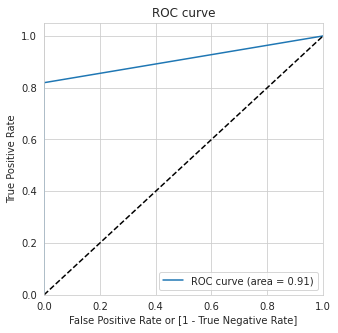

In [166]:
draw_roc(y_test,y_pred_roc_xg)

In [167]:
Xgboost_roc_rocauc_test=roc_auc_score(y_test,y_pred_roc_xg)

# 8.3 **Bulding XGBOOST using smote**

In [168]:
folds = 2
param_grid = {'subsample' : [0.6,0.7],
              'max_depth' : [5,6],
              'learning_rate' : [0.1,0.2],
              'n_estimators' : [200,300],

}

smote_xg = XGBClassifier()

model_cv = GridSearchCV(estimator = smote_xg,
                        param_grid = param_grid,
                        scoring = 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score = True)

model_cv.fit(X_smote,y_smote)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed: 101.2min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [5, 6],
                         'n_estimators': [200, 300], 'subsample': [0.6, 0.7]},
             pre_dispat

In [169]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,140.006227,0.299416,2.075443,0.030384,0.1,5,200,0.6,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.999949,0.999963,0.999956,0.000007,16,0.999996,0.999996,0.999996,6.481117e-08
1,143.096318,0.400549,2.057900,0.011265,0.1,5,200,0.7,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.999953,0.999968,0.999961,0.000007,15,0.999998,0.999996,0.999997,8.363090e-07
2,207.719835,0.267207,3.108977,0.016013,0.1,5,300,0.6,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.999969,0.999982,0.999975,0.000007,12,1.000000,1.000000,1.000000,1.933984e-08
3,212.745648,0.367434,3.108889,0.020189,0.1,5,300,0.7,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.999966,0.999983,0.999974,0.000008,13,1.000000,1.000000,1.000000,6.059478e-10
4,167.254289,0.371717,2.391613,0.035226,0.1,6,200,0.6,"{'learning_rate': 0.1, 'max_depth': 6, 'n_esti...",0.999968,0.999984,0.999976,0.000008,11,1.000000,1.000000,1.000000,6.488692e-08


In [170]:
# printing the optimal accuracy score and hyperparameters
print("best roc_auc", model_cv.best_score_)
print(model_cv.best_estimator_)

best roc_auc 0.9999891631022484
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)


In [171]:
smote_xg = XGBClassifier (learning_rate = 0.2, max_depth = 6, n_estimators= 300 , subsample= 0.6)

smote_xg.fit(X_smote,y_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

In [172]:
y_pred_smote_xg = smote_xg.predict(np.array(X_test))

In [173]:
print(classification_report(y_test,y_pred_smote_xg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.80      0.84      0.82       144

    accuracy                           1.00     85443
   macro avg       0.90      0.92      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [174]:
print("Accuracy -->",accuracy_score(y_test,y_pred_smote_xg))
print("Precison -->",precision_score(y_test,y_pred_smote_xg))
print("Recall/Sensitivity -->",recall_score(y_test,y_pred_smote_xg))
print("F1 -->",f1_score(y_test,y_pred_smote_xg))

Accuracy --> 0.9993797034280163
Precison --> 0.8013245033112583
Recall/Sensitivity --> 0.8402777777777778
F1 --> 0.8203389830508475


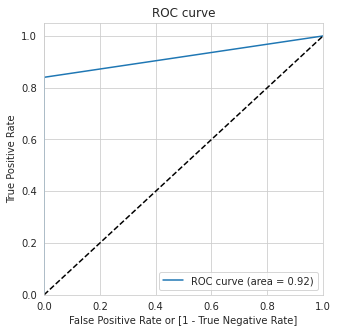

In [175]:
draw_roc(y_test,y_pred_smote_xg)

In [176]:
Xgboost_smote_rocauc_test=roc_auc_score(y_test,y_pred_smote_xg)

# 8.4 **Bulding XGBOOST using ADASYN**

In [177]:
folds = 2
param_grid = {'subsample' : [0.6,0.7],
              'max_depth' : [5,6],
              'learning_rate' : [0.1,0.2],
              'n_estimators' : [200,300],

}

adasyn_xg = XGBClassifier()

model_cv = GridSearchCV(estimator = adasyn_xg,
                        param_grid = param_grid,
                        scoring = 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score = True)

model_cv.fit(X_adasyn,y_adasyn)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed: 95.0min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [5, 6],
                         'n_estimators': [200, 300], 'subsample': [0.6, 0.7]},
             pre_dispat

In [178]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,128.332592,0.602021,1.990080,0.001472,0.1,5,200,0.6,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.989229,0.993612,0.991421,0.002191,16,0.999995,0.999998,0.999996,1.499747e-06
1,131.537597,0.532642,2.018540,0.008026,0.1,5,200,0.7,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.988431,0.994593,0.991512,0.003081,14,0.999998,0.999998,0.999998,1.323869e-08
2,189.549773,2.037694,3.039543,0.024316,0.1,5,300,0.6,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.987266,0.995891,0.991579,0.004313,13,1.000000,1.000000,1.000000,1.519414e-07
3,195.459042,0.794729,3.033787,0.009429,0.1,5,300,0.7,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.987458,0.996632,0.992045,0.004587,11,1.000000,1.000000,1.000000,1.206341e-07
4,156.593657,1.518678,2.413341,0.002518,0.1,6,200,0.6,"{'learning_rate': 0.1, 'max_depth': 6, 'n_esti...",0.988066,0.995851,0.991958,0.003892,12,1.000000,0.999999,1.000000,2.942887e-07


In [179]:
# printing the optimal accuracy score and hyperparameters
print("best roc_auc", model_cv.best_score_)
print(model_cv.best_estimator_)

best roc_auc 0.9930929013709948
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)


In [180]:
adasyn_xg = XGBClassifier (learning_rate = 0.2, max_depth = 6, n_estimators= 300 , subsample= 0.7)

adasyn_xg.fit(X_adasyn,y_adasyn)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)

In [181]:
y_pred_adasyn_xg = adasyn_xg.predict(np.array(X_test))

In [182]:
print(classification_report(y_test,y_pred_adasyn_xg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.78      0.85      0.81       144

    accuracy                           1.00     85443
   macro avg       0.89      0.92      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [183]:

print("Accuracy -->",accuracy_score(y_test,y_pred_adasyn_xg))
print("Precison -->",precision_score(y_test,y_pred_adasyn_xg))
print("Recall/Sensitivity -->",recall_score(y_test,y_pred_adasyn_xg))
print("F1 -->",f1_score(y_test,y_pred_adasyn_xg))

Accuracy --> 0.9993445923013002
Precison --> 0.782051282051282
Recall/Sensitivity --> 0.8472222222222222
F1 --> 0.8133333333333332


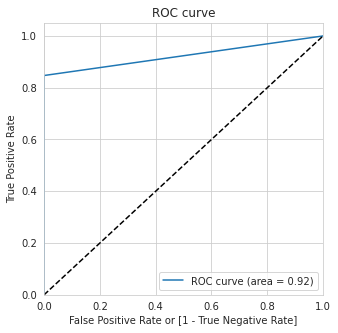

In [184]:
draw_roc(y_test,y_pred_adasyn_xg)

In [185]:
Xgboost_adasysn_rocauc_test=roc_auc_score(y_test,y_pred_adasyn_xg)

In [186]:
Xgboost_final_df = pd.DataFrame({'Model':['Xgboost_Imbalance',
                                                 'Xgboost_RandomOverSampling',
                                                 'Xgboost_Smote',
                                                 'Xgboost_Adasyn'],
                                        'ROC_AUC_Score':  [Xgboost_Imb_rocauc_test,
                                                           Xgboost_roc_rocauc_test,
                                                           Xgboost_smote_rocauc_test,
                                                           Xgboost_adasysn_rocauc_test]
										 })
Xgboost_final_df




,Model,ROC_AUC_Score
0,Xgboost_Imbalance,0.913153
1,Xgboost_RandomOverSampling,0.909658
2,Xgboost_Smote,0.919963
3,Xgboost_Adasyn,0.923412


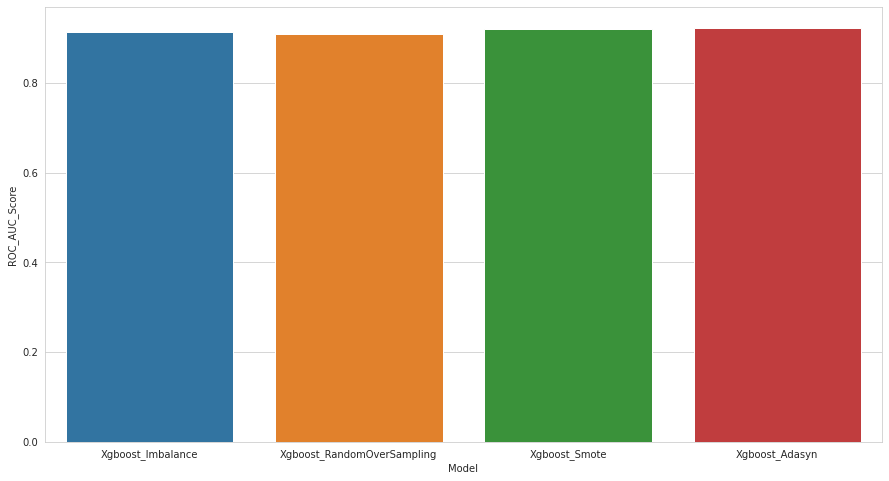

In [187]:
plt.figure(figsize=(15,8))
sns.barplot(x=Xgboost_final_df.Model,y=Xgboost_final_df.ROC_AUC_Score)
plt.show()

# **9. Random Forest**

# 9.1 **Random Forest with Imbalance**

In [188]:
random_forest_im = RandomForestClassifier(n_estimators=100)

In [189]:
random_forest_im.fit(X_train,y_train)
y_pred_im = random_forest_im.predict(X_test)
random_forest_im.score(X_test,y_test)

0.9995435553526912

In [190]:
print('AUPRC score: {}'. format(metrics.average_precision_score(y_test, y_pred_im)))
print('AUROC score: {}'.format(metrics.roc_auc_score(y_test, y_pred_im)))
print('Accuracy score: {}'.format(metrics.accuracy_score(y_test, y_pred_im)))
print(metrics.classification_report(y_test, y_pred_im))

AUPRC score: 0.7332025762249181
AUROC score: 0.8923142172436567
Accuracy score: 0.9995435553526912
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.93      0.78      0.85       144

    accuracy                           1.00     85443
   macro avg       0.97      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [191]:
print("Confusion Matrix:")
cnf_matrix_im = confusion_matrix(y_test,y_pred_im)

Confusion Matrix:


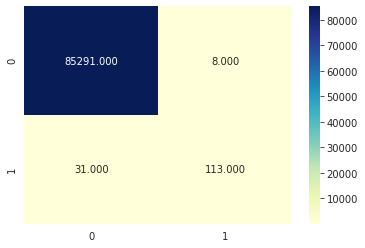

In [192]:
labels = [0,1]
sns.heatmap(cnf_matrix_im, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()


In [193]:
result2_im = accuracy_score(y_test,y_pred_im)
print("Accuracy:",result2_im)

Accuracy: 0.9995435553526912


In [194]:
randomForest_imb_test=roc_auc_score(y_test, y_pred_im)

# 9.2 **Random Forest using SMOTE**

In [195]:
random_forest_smote= RandomForestClassifier(n_estimators=100)
random_forest_smote.fit(X_smote,y_smote)
y_pred_smote = random_forest_smote.predict(X_test)
random_forest_smote.score(X_test,y_test)


0.9995084442259752

In [196]:
print(metrics.classification_report(y_test, y_pred_smote))
print('AUPRC score: {}'. format(metrics.average_precision_score(y_test, y_pred_smote)))
print('AUROC score: {}'.format(metrics.roc_auc_score(y_test, y_pred_smote)))
print('Accuracy score: {}'.format(metrics.accuracy_score(y_test, y_pred_smote)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.87      0.83      0.85       144

    accuracy                           1.00     85443
   macro avg       0.93      0.92      0.93     85443
weighted avg       1.00      1.00      1.00     85443

AUPRC score: 0.7249185701731488
AUROC score: 0.916561155464894
Accuracy score: 0.9995084442259752


In [197]:
cnf_matrix_smote = confusion_matrix(y_test,y_pred_smote)

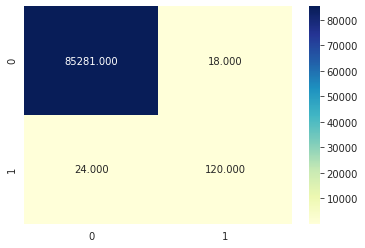

In [198]:
labels = [0,1]
sns.heatmap(cnf_matrix_smote, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()

In [199]:
result2_smote = accuracy_score(y_test,y_pred_smote)
print("Accuracy:",result2_smote)

Accuracy: 0.9995084442259752


In [200]:
randomForest_smote_test=roc_auc_score(y_test, y_pred_smote)

# 9.3 **Random Forest using RandomOverSampling**

In [201]:
random_forest_ros= RandomForestClassifier(n_estimators=100)
random_forest_ros.fit(X_ros,y_ros)
y_pred_ros = random_forest_ros.predict(X_test)
random_forest_ros.score(X_test,y_test)

0.9995786664794073

In [202]:
print(metrics.classification_report(y_test, y_pred_ros))
print('AUPRC score: {}'. format(metrics.average_precision_score(y_test, y_pred_ros)))
print('AUROC score: {}'.format(metrics.roc_auc_score(y_test, y_pred_ros)))
print('Accuracy score: {}'.format(metrics.accuracy_score(y_test, y_pred_ros)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.94      0.80      0.86       144

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443

AUPRC score: 0.7531285696711879
AUROC score: 0.8992645234215328
Accuracy score: 0.9995786664794073


In [203]:
cnf_matrix_ros = confusion_matrix(y_test,y_pred_ros)

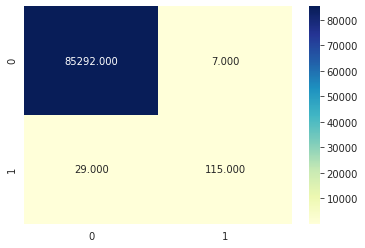

In [204]:
labels = [0,1]
sns.heatmap(cnf_matrix_ros, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()

In [205]:
result2_ros = accuracy_score(y_test,y_pred_ros)
print("Accuracy:",result2_ros)

Accuracy: 0.9995786664794073


In [206]:
randomForest_roc_test=roc_auc_score(y_test, y_pred_ros)

# 9.4 **Random Forest using ADASYN**

In [207]:
random_forest_adasyn= RandomForestClassifier(n_estimators=100)
random_forest_adasyn.fit(X_adasyn, y_adasyn)
y_pred_adasyn = random_forest_adasyn.predict(X_test)
random_forest_adasyn.score(X_test,y_test)


0.9994733330992591

In [208]:
print(metrics.classification_report(y_test, y_pred_adasyn))
print('AUPRC score: {}'. format(metrics.average_precision_score(y_test, y_pred_adasyn)))
print('AUROC score: {}'.format(metrics.roc_auc_score(y_test, y_pred_adasyn)))
print('Accuracy score: {}'.format(metrics.accuracy_score(y_test, y_pred_adasyn)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.86      0.83      0.84       144

    accuracy                           1.00     85443
   macro avg       0.93      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443

AUPRC score: 0.707776605512402
AUROC score: 0.9130772097758081
Accuracy score: 0.9994733330992591


In [209]:
print("Confusion Matrix:")
cnf_matrix_adasyn = confusion_matrix(y_test,y_pred_adasyn)


Confusion Matrix:


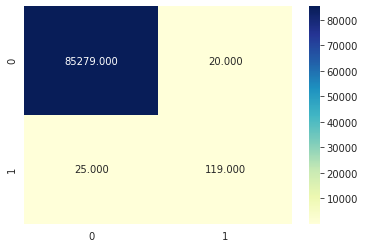

In [210]:
labels = [0,1]
sns.heatmap(cnf_matrix_adasyn, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()


In [211]:
result2_adasyn = accuracy_score(y_test,y_pred_adasyn)
print("Accuracy:",result2_adasyn)

Accuracy: 0.9994733330992591


In [212]:
randomForest_adasyn_test=roc_auc_score(y_test, y_pred_adasyn)

In [213]:
Random_Forest_final_df = pd.DataFrame({'Model':['Random_Forest_Imbalance',
                                                 'Random_Forest_RandomOverSampling',
                                                 'Random_Forest_Smote',
                                                 'Random_Forest_Adasyn'],
                                        'ROC_AUC_Score':  [randomForest_imb_test,
                                                           randomForest_roc_test,
                                                           randomForest_smote_test,
                                                           randomForest_adasyn_test]
										 })
Random_Forest_final_df


,Model,ROC_AUC_Score
0,Random_Forest_Imbalance,0.892314
1,Random_Forest_RandomOverSampling,0.899265
2,Random_Forest_Smote,0.916561
3,Random_Forest_Adasyn,0.913077


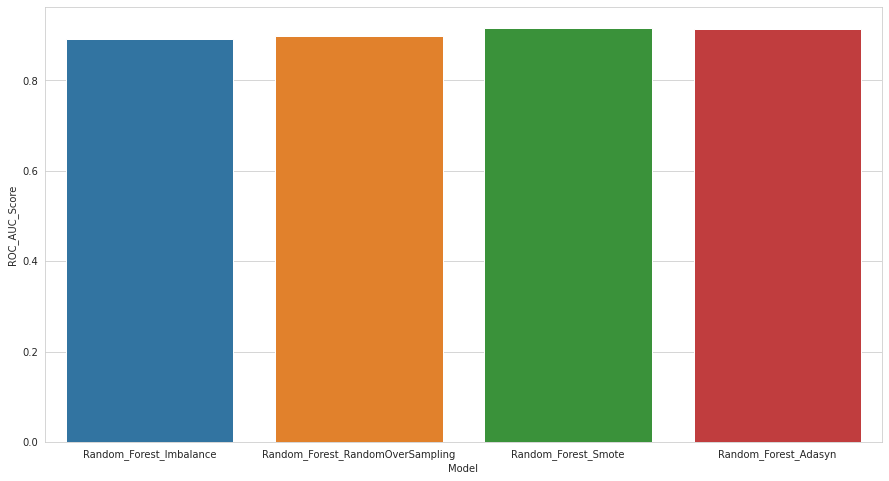

In [214]:


plt.figure(figsize=(15,8))
sns.barplot(x=Random_Forest_final_df.Model,y=Random_Forest_final_df.ROC_AUC_Score)
plt.show()

# **10. Conclusion**

In [215]:
All_model_final_df = pd.DataFrame({'Model':['Logestic_Regression_Imbalance',
																			'Logestic_Regression_RandomOverSampling',
																			'Logestic_Regression_Smote',
																			'Logestic_Regression_Adasyn',
																			'Random_Forest_Imbalance',
																			'Random_Forest_RandomOverSampling',
																			'Random_Forest_Smote',
																			'Random_Forest_Adasyn',
																			'Xgboost_Imbalance',
																			'Xgboost_RandomOverSampling',
																			'Xgboost_Smote',
																			'Xgboost_Adasyn',
																			'Decision_Tree_Imbalance',
																			'Decision_Tree_RandomOverSampling',
																			'Decision_Tree_Smote',
																			'Decision_Tree_Adasyn'],
                  'ROC_AUC_Score':  [roc_auc_score_imb_test,
																			roc_auc_score_ros_test,
																			roc_auc_score_smote_test,
																			roc_auc_score_adasyn_test,
																			randomForest_imb_test,
																			randomForest_roc_test,
																			randomForest_smote_test,
																			randomForest_adasyn_test,
																			Xgboost_Imb_rocauc_test,
																			Xgboost_roc_rocauc_test,
																			Xgboost_smote_rocauc_test,
																			Xgboost_adasysn_rocauc_test,
																			Dt_Im_rocauc_test,
																			Dt_ros_rocauc_test,
																			Dt_smote_rocauc_test,
																			Dt_adasyn_rocauc_test,]})
All_model_final_df




,Model,ROC_AUC_Score
0,Logestic_Regression_Imbalance,0.892185
1,Logestic_Regression_RandomOverSampling,0.937651
2,Logestic_Regression_Smote,0.933828
3,Logestic_Regression_Adasyn,0.923791
4,Random_Forest_Imbalance,0.892314
5,Random_Forest_RandomOverSampling,0.899265
6,Random_Forest_Smote,0.916561
7,Random_Forest_Adasyn,0.913077
8,Xgboost_Imbalance,0.913153
9,Xgboost_RandomOverSampling,0.909658


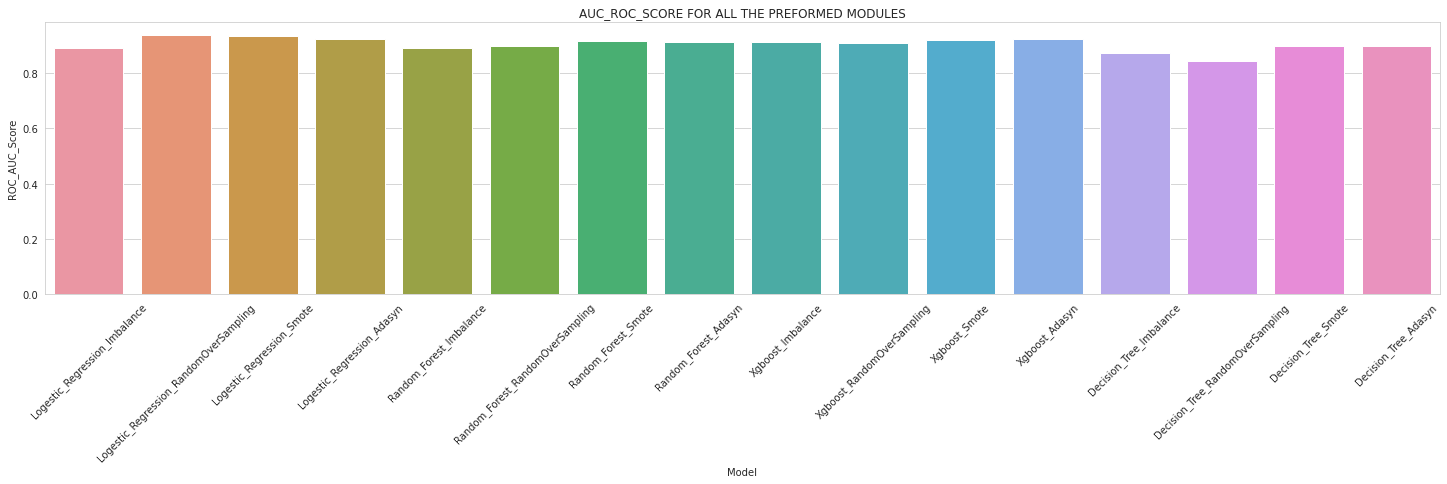

In [221]:
plt.figure(figsize=(25,5))
sns.barplot(x=All_model_final_df.Model,y=All_model_final_df.ROC_AUC_Score)
plt.title('AUC_ROC_SCORE FOR ALL THE PREFORMED MODULES')
plt.xticks(rotation=45)
plt.show()

In [222]:
All_model_final_df.ROC_AUC_Score.max()

0.9376514281136551

### From the above auc_roc_score we san conclude that Logestic regression with smote has the highest score of 0.9376514281136551 and the time taken to execute the code is very less when compare to XGBOOST and RANDOM FOREST, So we can use Logestic Regression.

In [235]:
Top_3_models = All_model_final_df.sort_values(by='ROC_AUC_Score',  ascending=False).head(3)
Top_3_models.head()

,Model,ROC_AUC_Score
1,Logestic_Regression_RandomOverSampling,0.937651
2,Logestic_Regression_Smote,0.933828
3,Logestic_Regression_Adasyn,0.923791


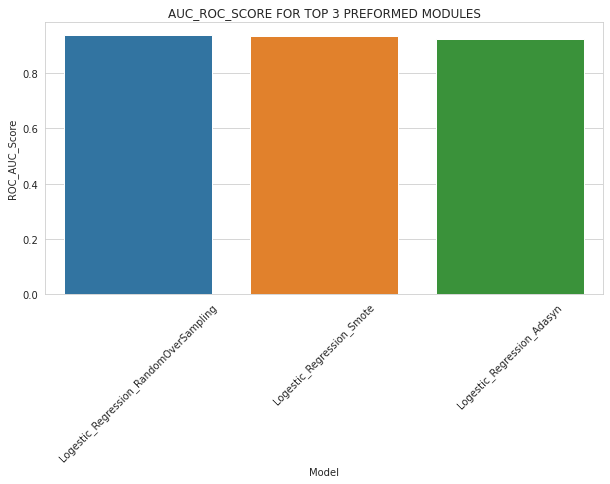

In [237]:
plt.figure(figsize=(10,5))
sns.barplot(x=Top_3_models.Model,y=Top_3_models.ROC_AUC_Score)
plt.title('AUC_ROC_SCORE FOR TOP 3 PREFORMED MODULES')
plt.xticks(rotation=45)
plt.show()

## **Above are the top 3 models**

#### ------------------------------------------------- THE END -----------------------------------